## Natural Language Processing - Final Project

__Group Members:__
1) Aanal Patel - C0910376
2) Bimal Shresta - C0919385
3) Danilo Diaz - C0889539
4) Ernie Sumoso - C0881591
5) Jayachandhran Saravanan - C0910392

__Main Sections__

__1. Data Collection__
__2. Text wrangling/cleaning__
- Removing stopwords
- number removal
- punctuation removal
- whitespace removal
    
__3. Verbs simmilarity__
- Sentence & Word tokenization
- identifying POS tags
- Stemming
- Lemmatization
    
__4. Action verbs recommendation__
- Synonyms (WordNet -> Synsets)
- Simmilarity between words (Synsets)
    
__5. Keywords simmilarity__
- identifying POS tags
- Named Entity recognition
- Word Collocations: Bigrams (PMI and likelihood ratio)
- Word Collocations: Trigrams (PMI and likelihood ratio)
    
__6. Correcting spelling errors from resume__
- Spell class from autocorrect library
- Suggest function from pattern library
    
__7. Resume sentiment analysis__
- Sentiment analysis (scores & 4 keypoints)
    
__8. Calculating Resume - Job Description overall simmilarity__
- Bag of Words
- TFIDF
- Cosine/pairwise simmilarity

__9. Classification Models -(Module 5)-__
- Feature extraction (extract most common words from job description)
- Split dataset train & test
- Classification Model (Naive Bayes)
- Saving, loading, evaluating model w/ new data
- Classification Pipelines --(Module 8)--

__10. Finding relations between resumes & job descriptions__
- Word2Vec (static word embedding)

### 1. Data Collection

We have 2 main sources of data:
- __resumes dataset__: retrieved from Kaggle source (https://www.kaggle.com/code/medelbachirkhellaf/resume-dataset/input)
- __job descriptions__: web scrapped from Indeed using our GitHub project (https://github.com/NILodio/JobsPyMacher)

The scripts to generate our Job Descriptions datset is located under the directory __/src/data__ in our GitHub project.

We created a class __JobScrapperAPI__ that calls our implemented function __scrape_jobs__ located in __/src/jobscrapper__.

Our project scraps public posts from Indeed Canada (https://ca.indeed.com/), however it can be used for other websites.

After executing the main script __make_raw_data.py__ to generate the dataset, the result is a unified CSV file containing all searched job descriptions.

Some of the parameters implemented for the dataset generation script are:
- __num_jobs__: number of jobs to scrap
- __num_batch__: number of jobs per search term to scrap
- __JOBS_WEBSITE__: set as environment variable, webiste to scrap
- __JOBS_COUNTRY__: set as environment variable, country to search for jobs (default Canada)
- __SEARCH_TERMS__: set as environment variable, list of search terms to insert in the website for job scrapping

Our generated dataset was saved into __jobs_13547.csv__. The most relevant columns are:
- __description__: job description from the post
- __search term__: search term utilized on the website

Let's load both data sources (resumes and job descriptions) into memory.

In [1]:
import pandas as pd
# loading the job descriptions dataset
df_jobs = pd.read_csv('jobs_13547.csv')
df_jobs.tail()

,site,job_url,job_url_direct,title,company,location,job_type,date_posted,interval,min_amount,...,company_addresses,company_industry,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,search_term
13541,indeed,https://ca.indeed.com/viewjob?jk=6cdc51ad05295587,https://www.westlaketalent.com/planning-and-in...,Planning & Inventory Analyst,Westlake Careers,"Woodbridge, ON, CA",fulltime,2024-03-08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data analyst
13542,indeed,https://ca.indeed.com/viewjob?jk=cdfdabac384c17eb,http://ca.indeed.com/job/sql-developer-and-bus...,SQL Developer and Business Intelligence Specia...,Dex Clothing,"Saint-Laurent, QC, CA",fulltime,2024-03-05,NaN,NaN,...,"390 Deslauriers, Saint-Laurent, QC, H4N-1V8",Retail,51 to 200,$25M to $100M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,data analyst
13543,indeed,https://ca.indeed.com/viewjob?jk=9ac1c7981bb3c9bb,https://jsv3.recruitics.com/redirect?rx_cid=36...,Business Analyst,GFL Environmental,"Mississauga, ON, CA",fulltime,2024-02-22,NaN,NaN,...,"Vaughan, ON",NaN,"10,000+",$1B to $5B (USD),GFL is committed to providing a greener altern...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,Patrick Dovigi,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,data analyst
13544,indeed,https://ca.indeed.com/viewjob?jk=4aa684848233fe0b,https://cclfg.cclgroup.com/careers/opportuniti...,"Data Analyst, Investment Data Analytics","Connor, Clark & Lunn Financial Group","Vancouver, BC, CA",NaN,2024-02-05,NaN,NaN,...,NaN,Banks And Financial Services,"501 to 1,000",NaN,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,data analyst
13545,indeed,https://ca.indeed.com/viewjob?jk=f8ce8d3bb493631d,https://jobs.toronto.ca/jobsatcity/job/Toronto...,BUSINESS ANALYST,City of Toronto,"Toronto, ON, CA","temporary, fulltime",2023-10-13,NaN,NaN,...,"100 Queen Street West, Toronto, ON, Canada, On...",Government,"10,000+",more than $10B (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,Olivia Chow,NaN,data analyst


Our Kaggle source contains the resumes in PDF format and organized under multiple folders (inside __data__),

so we need to properly __extract the text from the PDFs.__

Let's also add the name of the folders (professions) as one column.

In [2]:
from os import listdir # list files of a directory
from os.path import isfile, isdir, join # file operations
import PyPDF2 # pdf processing library

# class in charge of loading our resume data source
class ResumeDataLoader:
    def get_list_of_files(self, data_path):
        '''
            function: get_list_of_files -> creates a list of the file paths 
            arg: data_path (str) -> path of the file
            return: files (list) -> List of files
        '''
        # get list of files from the data path
        files = [file for file in listdir(data_path) if isfile(join(data_path, file))]
        # get list of folders from the data path
        dirs = [(file, join(data_path, file)) for file in listdir(data_path) if isdir(join(data_path, file))]
        # get files from each folder
        for i, dir_ in enumerate([d[1] for d in dirs]):
            files += [(dirs[i][0], join(dir_, file), file) for file in listdir(dir_) if isfile(join(dir_, file))]
        return files # return all files
    
    def get_text_from_pdf(self, file_path):
        '''
            function: get_text_from_pdf -> fetch the data from the file path
            arg: file_path (str) -> path of the file
            return: text (str) -> content of the file
        '''
        file = open(file_path, 'rb') # open file in read mode
        reader = PyPDF2.PdfReader(file) # instantiate the pdf2 class to read our file
        text = "" 
        for page in reader.pages: # extracting text of each page
            text += page.extract_text()
        file.close()
        return text # return the entire pdf raw text

    def convert_pdfs_into_dataframe(self, pdfs):
        '''
            function: convert_pdfs_into_dataframe -> converts pdf data into a data frame 
            arg: pdfs (list) -> list of the file paths
            return: df (pandas.core.frame.DataFrame) -> Data frame 
        '''
        rows = [] # save future dataframe rows into a list
        for pdf in pdfs: # for each file, create a dictionary (keys-columns, values-row values)
            rows.append({'file': pdf[2], 'profession': pdf[0], 'resume':self.get_text_from_pdf(pdf[1])})
        return pd.DataFrame(rows) # return the resultant dataframe

In [3]:
rdl = ResumeDataLoader() # instantiate our class
files = rdl.get_list_of_files('data') # read all file names (recursively under data folder)
print("# Files:", len(files)) # display resultant list
files[:5]

# Files: 2484


[('ACCOUNTANT', 'data\\ACCOUNTANT\\10554236.pdf', '10554236.pdf'),
 ('ACCOUNTANT', 'data\\ACCOUNTANT\\10674770.pdf', '10674770.pdf'),
 ('ACCOUNTANT', 'data\\ACCOUNTANT\\11163645.pdf', '11163645.pdf'),
 ('ACCOUNTANT', 'data\\ACCOUNTANT\\11759079.pdf', '11759079.pdf'),
 ('ACCOUNTANT', 'data\\ACCOUNTANT\\12065211.pdf', '12065211.pdf')]

In [4]:
df_resumes = rdl.convert_pdfs_into_dataframe(files) # convert pdfs into text into a dataframe
df_resumes.tail()

Dealing with missing values:

Let's __remove missing values from job description texts and resumes__, and remain with a fully textual columns.

These missing values won't contribute anything to our analysis.

In [5]:
# identifying number of missing values from jobs
df_jobs[df_jobs['description'].isna()]

,site,job_url,job_url_direct,title,company,location,job_type,date_posted,interval,min_amount,...,company_addresses,company_industry,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,search_term


In [6]:
# identifying number of missing values from resumes
df_resumes[df_resumes['resume'].isna()]

,Unnamed: 0,file,profession,resume
802,802,12632728.pdf,BUSINESS-DEVELOPMENT,NaN


In [7]:
# dropping missing values and checking missing values again
df_resumes = df_resumes[df_resumes['resume'].notna()]
df_resumes[df_resumes['resume'].isna()]

,Unnamed: 0,file,profession,resume


Our 'search_term' column (from job descriptions) and 'profession' column (from resumes) should contain same values.

Let's normalize the columns so we can map the resumes to the job descriptions in later steps.

In [8]:
# show search term value counts from job descriptions
df_jobs['search_term'].unique()

array(['accountant', 'advocate', 'agriculture', 'apparel', 'arts',
       'automobile', 'aviation', 'banking', 'bpo', 'business development',
       'chef', 'construction', 'consultant', 'designer', 'digital media',
       'engineering', 'finance', 'fitness', 'healthcare', 'hr',
       'information technology', 'public relations', 'sales', 'teacher',
       'software engineer', 'software developer', 'data scientist',
       'data analyst'], dtype=object)

In [9]:
# show resume professions value counts
df_resumes['profession'].unique()

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [10]:
# lower case and replace lines for whitepsaces
df_resumes['profession'] = df_resumes['profession'].apply(lambda x : x.lower().replace('-',' '))
df_resumes['profession'].unique()

array(['accountant', 'advocate', 'agriculture', 'apparel', 'arts',
       'automobile', 'aviation', 'banking', 'bpo', 'business development',
       'chef', 'construction', 'consultant', 'designer', 'digital media',
       'engineering', 'finance', 'fitness', 'healthcare', 'hr',
       'information technology', 'public relations', 'sales', 'teacher'],
      dtype=object)

In [11]:
# save resume dataset as a CSV for fast reference in later steps
df_resumes.to_csv('resumes.csv')

### Exploratory Data Analysis

In [12]:
class EDABasic:
    def __init__(self, df):
        '''
            function: Constructor
            arg: df (pandas.core.frame.DataFrame) -> dataframe to perform EDA
            return: None
        '''
        self.df = df
        self.basicEDA()
        
    def basicEDA(self):
        '''
            function: basicEDA -> This function will call the function that are used for EDA
            arg: None
            return: None
        '''
        self.shapeAndSizeFunction()
        self.nullValuesFunction()
        self.duplicatedFunction()
        self.infoFunction()

    def shapeAndSizeFunction(self):
        '''
            function: shapeAndSizeFunction -> It is a function to check the shape and the size of the data set
            arg: None
            return: None
        '''
        # checking the shape of the data frame
        self.printLine()
        shape = self.df.shape
        print("SHAPE OF DATAFRAME:")
        print('Columns = {}'.format(shape[0]))
        print('Rows = {}'.format(shape[1]))
        size = self.df.size
        self.printLine()
        print("SIZE OF DATAFRAME: {}".format(size))
        
    def nullValuesFunction(self):
        '''
            function: nullValuesFunction -> It is a function to check the count of the missing values in the dataframe
            arg: None
            return: None
        '''
        # cheking the missing values
        nullValues = self.df.isna().sum()
        noNull = 'No Null values' if nullValues.sum == 0 else nullValues
        self.printLine()
        print('Checking the missing values:\n')
        print('Missing values:\n{}'.format(noNull))
        
    def duplicatedFunction(self):
        '''
            function: duplicatedFunction -> It is a function to check the count of the duplicate rows in the dataframe
            arg: None
            return: None
        '''
        # checking the duplicates
        duplicates = self.df.duplicated().sum()
        noduplicates = 'No Duplicat values' if duplicates == 0 else duplicates
        self.printLine()
        print('Checking the Duplicate values:')
        print('Duplicate values = {}'.format(noduplicates))
        
    def infoFunction(self):
        '''
            function: infoFunction -> This function will give the basic information about the dataframe
            arg: None
            return: None
        '''
        # information of the data set
        self.printLine()
        print('The information: ')
        print(self.df.info(),'')
    
    def boolPlot(self, col):
        '''
            function: boolPlot -> This function plots pie chart for boolean values
            arg: col(str) -> name of the column
            return: None
        '''
        size = self.df[col].value_counts()
        plt.pie(size, labels=size.index, autopct='%1.1f%%')
        plt.legend(labels=size.index)
        plt.title('boolean feature:{}'.format(col))
        plt.show()
        
    def barPlot(self, col):
        '''
            function: barPlot -> This function plots bar chart for catagorical values.
            arg: col(str) -> name of the column
            return: None
        '''
        size = self.df[col].value_counts()
        percent = round((size * 100) / self.df.shape[0], 1) # claulating the percentage of the frequency
        sns.barplot(x=percent.index, y=percent.values, palette='dark')
        plt.xticks(rotation=90)
        plt.title('feature:{}'.format(col))
        
        plt.show()
        
    def printLine(self):
        '''
            function: printLine -> This function will provide the print format for the class output
            arg: None
            return: None
        '''
        # creting the print format
        print('-'*50, '\n')
        

#### EDA of Job Description DataFrame

In [13]:
print('BASIC EDA FOR JOB DESCRIPTION')
eda = EDABasic(dfJobDes) # creating a class instance for Job description data frame

BASIC EDA FOR JOB DESCRIPTION


NameError: name 'dfJobDes' is not defined

In [ ]:
eda.boolPlot('is_remote')

In [ ]:
eda.barPlot('job_type')

#### EDA of Job Resume DataFrame

In [ ]:
print('BASIC EDA FOR RESUME')
edaResume = EDABasic(df_Resume) # creating a class instance for Resume data frame

In [ ]:
edaResume.barPlot('profession')

### 2. Text wrangling/cleaning
Let's create a class in charge of the following actions to clean our data sources:
- __Removing stopwords__ -> by using NLTK methods
- __Number removal__ -> by using Regex methods
- __Punctuation removal__ -> using String methods
- __Whitespace removal__ -> by using Regex methods

In [14]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import string

# class in charge of performing cleaning operations into raw text
class TextCleaning:
    def __init__(self):
        '''
            function: Constructor
            return: class instance
        '''
        self.STOPWORDS = stopwords.words('english') # set stopwords constant
        
    def remove_stopwords(self, text):
        '''
            function: remove_stopwords
            arg: text (str) -> text to perform the stopwords removal
            return: text (str) -> text without stopwords
        '''
        # tokenize the text
        tokenized_text = word_tokenize(text)
        
        # loop through text words and remove stopwords
        i = 0
        while i < len(tokenized_text):
            # if word is a stopword remove from tokenized list
            if tokenized_text[i].lower() in self.STOPWORDS:
                tokenized_text.pop(i)
                i -= 1
                continue
            i += 1
        return ' '.join(tokenized_text) # return string with remaining words joined by whitespace
    
    def remove_numbers(self, text, replace=''):
        '''
            function: remove_numbers
            arg: text (str) -> text to perform the numbers removal
                 replace (str) -> optional text to replace numbers with
            return: text (str) -> text without numbers
        '''
        # removing numbers from text using regex sub method
        return re.sub(r'\d+', replace, text)
    
    def remove_punctuation(self, text, replace=' '):
        '''
            function: remove_punctuation
            arg: text (str) -> text to perform the punctuation removal
                 replace (str) -> optional text to replace punctuations with
            return: text (str) -> text without punctuation
        '''
        # removing punctuation from text using string methods
        return text.translate(str.maketrans(replace, replace, string.punctuation))
    
    def remove_whitespaces(self, text, replace=' '):
        '''
            function: remove_whitespaces
            arg: text (str) -> text to perform the whitespaces removal
                 replace (str) -> optional text to replace whitespaces with
            return: text (str) -> text without whitespaces
        '''
        # removing whitespaces from text using regex sub method
        return re.sub(r'\s+', ' ', text.strip())
        
tc = TextCleaning()
tc

In [15]:
# let's test some methods on our job descriptions
df_jobs['description'].apply(tc.remove_punctuation)

0        About us\n\nAt MRR we are proud that our essen...
1        Job Req ID 561\nDepartment Cash Management and...
2        Work Location\nToronto Ontario Canada\nHours\n...
3        Reporting to the Chief Financial Officer and o...
4        Who we are\n\n  \n\n\nImagine being part of a ...
                               ...                        
13541    CONTRACT  temporary position for less than a y...
13542    We are seeking a skilled SQL Developer and BI ...
13543    As a Business Analyst you will work at the int...
13544    Data Analyst Investment Data Analytics\nConnor...
13545    Job ID 30364\nJob Category Policy Planning  Re...
Name: description, Length: 13546, dtype: object

In [16]:
# let's test some methods on our job descriptions
df_jobs['description'].apply(tc.remove_whitespaces)

0        **About us** At MRR, we are proud that our ess...
1        **Job Req ID:** 561 **Department:** Cash Manag...
2        Work Location: Toronto, Ontario, Canada Hours:...
3        Reporting to the Chief Financial Officer and o...
4        **Who we are** Imagine being part of a team wh...
                               ...                        
13541    **CONTRACT -** temporary position for less tha...
13542    We are seeking a skilled SQL Developer and BI ...
13543    As a Business Analyst, you will work at the in...
13544    **Data Analyst, Investment Data Analytics** **...
13545    **Job ID:** 30364 **Job Category:** Policy, Pl...
Name: description, Length: 13546, dtype: object

In [17]:
# Let's clean our resumes and job descriptions
def clean_text_column(df_original, col, stops=True, numbers=True, punctuations=True, whitespaces=True, lowercase=True):
    
    tc = TextCleaning() # instantiate text cleaning class
    df = df_original[col].copy() # copy of the column for safety
    
    # perform actions depending on each flags
    if lowercase:
        df = df.apply(str.lower)
    if stops: 
        df = df.apply(tc.remove_stopwords)
    if numbers:
        df = df.apply(tc.remove_numbers)
    if punctuations:
        df = df.apply(tc.remove_punctuation)
    if whitespaces:
        df = df.apply(tc.remove_whitespaces)
        
    return df # return copy of the column after operations

In [18]:
# clean the job descriptions texts
df_jobs['description_clean'] = clean_text_column(df_jobs, 'description')
df_jobs[['description_clean', 'search_term']]

,description_clean,search_term
0,us mrr proud essential services technologies d...,accountant
1,job req id department cash management investme...,accountant
2,work location toronto ontario canada hours lin...,accountant
3,reporting chief financial officer principals c...,accountant
4,imagine part team human connection underlies e...,accountant
...,...,...
13541,contract temporary position less year summary ...,data analyst
13542,seeking skilled sql developer bi business inte...,data analyst
13543,business analyst work intersection finance ope...,data analyst
13544,data analyst investment data analytics connor ...,data analyst


In [19]:
# clean the resumes texts
df_resumes['resume_clean'] = clean_text_column(df_resumes, 'resume')
df_resumes[['resume_clean', 'profession']]

,resume_clean,profession
0,accountant summary financial accountant specia...,accountant
1,staff accountant summary highly analytical det...,accountant
2,accountant professional summary obtain positio...,accountant
3,senior accountant experience company name june...,accountant
4,senior accountant professional summary senior ...,accountant
...,...,...
2479,reading teacher summary highly motivated educa...,teacher
2480,history teacher professional summary employed ...,teacher
2481,teacher summary highly ethical dependable dili...,teacher
2482,teacher summary talented early education profe...,teacher


### 3. Verbs simmilarity

Now that the texts are clean, let's proceed with the first feature of our tool and find the verbs simmilarity between the resumes and job descriptions.

We will test and compare both approaches for the verbs:
- __Stemming__
- __Lemmatization__

In [20]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

class VerbsAnalyzer():
    def get_unique_words(self, text, print_=True):
        '''
            function: get_unique_words -> function to identify unique words from a text
            arg: text (str) -> raw text
                 print_ (bool) -> print (or not) additional information of the process
            return: unique_words (list) -> list of unique words from the text
        '''
        tokens = word_tokenize(text)
        unique_words = list(set(tokens))
        if print_:
            print("# Total words:", len(tokens))
            print("# Unique words:", len(unique_words))
        return unique_words
    
    def get_verbs(self, words, pos_prefix='V'):
        '''
            function: get_verbs -> this function identify verbs from the list of words by using part of speech tags
            arg: words (list) -> list of words
                 pos_prefix (str) -> prefix of the required pos tags, 'V' by default to identify verbs only
            return: tags (list) -> (word, pos tag) if the POS tag starts with the parameter pos_prefix
        '''
        text = ' '.join(words) # joining tokens into one text
        blob = TextBlob(text) # pos tagging words from text
        # identifying and returning only verbs from POS tags
        return [tag for tag in blob.tags if tag[1].startswith(pos_prefix)]
    
    def stem_verbs(self, words):
        '''
            function: stem_verbs -> apply stemming to a list of words
            arg: words (list) -> list of words
            return: (list) -> words after stemming
        '''
        stemmer = PorterStemmer() # instantiate stemmer
        return [stemmer.stem(word) for word in words] # apply stemming on all words
    
    def lemmatize_verbs(self, words, pos="v"):
        '''
            function: lemmatize_verbs -> apply lemmatization to a list of words
            arg: words (list) -> list of words
            return: (list) -> words after lemmatization
        '''
        lem = WordNetLemmatizer() # instantiate lemmatizer
        return [lem.lemmatize(word, pos=pos) for word in words] # apply lemmatization on all words

In [21]:
# function to extract verbs from text, apply a method and return list of only verbs with the method applied
def get_processed_verbs_from_text(text, method='stem', print_=True):
    
    va = VerbsAnalyzer() # instantiate our class
    unique_words = va.get_unique_words(text, print_=print_) # get resume unique words
    pos_verbs = va.get_verbs(unique_words) # extract only verbs from both
    
    if print_: # print insights if required
        print("# Original verbs:", len(pos_verbs))
        print("  Original Verbs (trimmed):")
        display(pos_verbs[:5])
        
    verbs = [verb[0] for verb in pos_verbs] # get only verbs without POS tags
    
    # apply technique over verbs and return processed list
    if method == 'stem':
        processed_verbs = va.stem_verbs(verbs)
    elif method == 'lemmatize':
        processed_verbs = va.lemmatize_verbs(verbs)
        
    if print_: # print insights if required
        print("# Unique verbs:", len(list(set(processed_verbs))))
        print("  Processed Verbs (trimmed):")
        display(processed_verbs[:5])
    
    return list(set(processed_verbs)) # return only unique verbs

In [22]:
# Let's test our function using one random resume and STEMMING
test_resume = df_resumes['resume_clean'][0]
_ = get_processed_verbs_from_text(test_resume, method='stem', print_=True)

# Total words: 2198
# Unique words: 891
# Original verbs: 229
  Original Verbs (trimmed):


[('safeguarded', 'VBD'),
 ('completed', 'VBD'),
 ('identify', 'VBP'),
 ('processing', 'VBG'),
 ('targeted', 'VBD')]

# Unique verbs: 190
  Processed Verbs (trimmed):


['safeguard', 'complet', 'identifi', 'process', 'target']

In [23]:
# Let's test our function using one random job and STEMMING
test_job = df_jobs['description_clean'][0]
_ = get_processed_verbs_from_text(test_job, method='stem', print_=True)

# Total words: 371
# Unique words: 273
# Original verbs: 55
  Original Verbs (trimmed):


[('decisionmaking', 'VBG'),
 ('provide', 'VBP'),
 ('behave', 'VBP'),
 ('objectives', 'VBZ'),
 ('proven', 'VBP')]

# Unique verbs: 51
  Processed Verbs (trimmed):


['decisionmak', 'provid', 'behav', 'object', 'proven']

In [24]:
# Let's test our function using one random resume and LEMMATIZATION
test_resume = df_resumes['resume_clean'][0]
_ = get_processed_verbs_from_text(test_resume, method='lemmatize', print_=True)

# Total words: 2198
# Unique words: 891
# Original verbs: 229
  Original Verbs (trimmed):


[('safeguarded', 'VBD'),
 ('completed', 'VBD'),
 ('identify', 'VBP'),
 ('processing', 'VBG'),
 ('targeted', 'VBD')]

# Unique verbs: 191
  Processed Verbs (trimmed):


['safeguard', 'complete', 'identify', 'process', 'target']

In [25]:
# Let's test our function using one random job and LEMMATIZATION
test_job = df_jobs['description_clean'][0]
_ = get_processed_verbs_from_text(test_job, method='lemmatize', print_=True)

# Total words: 371
# Unique words: 273
# Original verbs: 55
  Original Verbs (trimmed):


[('decisionmaking', 'VBG'),
 ('provide', 'VBP'),
 ('behave', 'VBP'),
 ('objectives', 'VBZ'),
 ('proven', 'VBP')]

# Unique verbs: 51
  Processed Verbs (trimmed):


['decisionmaking', 'provide', 'behave', 'objectives', 'prove']

Now we can __compare the verbs from both texts__ and create a __metric for simmilarity.__

Overall we identify the following:

- __Simmilarity__: number of common verbs / number of verbs in job description
- __Common verbs__: between resume and job description
- __Lacking verbs__: verbs present in the job description that are NOT present in the resume

In [26]:
# function to calculate verbs simmilarity between 2 texts, common & lacking verbs
def get_verbs_simmilarity(text_resume, text_job, method='stem', print_=True):
    # extract and process verbs from both texts
    verbs_resume = get_processed_verbs_from_text(text_resume, method=method, print_=False)
    verbs_job = get_processed_verbs_from_text(text_job, method=method, print_=False)
    
    # get common verbs between both texts
    verbs_common = [verb for verb in verbs_resume if verb in verbs_job]
    
    # get lacking verbs (present in job description, but not in resume)
    verbs_lacking = [verb for verb in verbs_job if verb not in verbs_resume]
    
    # calculate, print, and return simmilarity
    simmilarity = len(verbs_common) * 100 / len(verbs_job)
    if print_: 
        print("% Verbs Simmilarity: {:.2f}".format(simmilarity))
        print("Common Verbs (trimmed):")
        display(verbs_common[:5])
        print("Lacking Verbs (trimmed):")
        display(verbs_lacking[:5])
    return simmilarity, verbs_common, verbs_lacking

Let's test our function using __Stemming and Lemmatization__

In [27]:
test_resume = df_resumes['resume_clean'][0]
test_job = df_jobs['description_clean'][0]
sim, common, lacking = get_verbs_simmilarity(test_resume, test_job, method='stem')

% Verbs Simmilarity: 25.49
Common Verbs (trimmed):


['account', 'develop', 'use', 'requir', 'identifi']

Lacking Verbs (trimmed):


['workplac', 'mrr', 'remot', 'share', 'overview']

In [28]:
test_resume = df_resumes['resume_clean'][0]
test_job = df_jobs['description_clean'][0]
sim, common, lacking = get_verbs_simmilarity(test_resume, test_job, method='lemmatize')

% Verbs Simmilarity: 29.41
Common Verbs (trimmed):


['provide', 'identify', 'pay', 'require', 'account']

Lacking Verbs (trimmed):


['generate', 'legacy', 'assessment', 'decisionmaking', 'mrr']

Now, to __compare both methods__ let's choose 1 job description and calculate simmilarities using

all resumes targeted for that job description industry. First let's visualize the available industries.

In [29]:
# display the available industries that we have from resumes
df_resumes['profession'].value_counts()

information technology    120
business development      119
accountant                118
advocate                  118
finance                   118
engineering               118
chef                      118
fitness                   117
aviation                  117
sales                     116
healthcare                115
consultant                115
banking                   115
construction              112
public relations          111
hr                        110
designer                  107
arts                      103
teacher                   102
apparel                    97
digital media              96
agriculture                63
automobile                 36
bpo                        22
Name: profession, dtype: int64

In [30]:
# Function to calculate the simmilarity between a job description text and a list of resumes
def get_verb_simmilarity_lists(job_text, resumes):
    # calculate simmilarities (with both methods) between the resumes and same job description
    sims_stem = []
    sims_lemmatize= []
    for resume_text in resumes:
        # calculate verb simmilarities and save values
        sim_stem, _, _ = get_verbs_simmilarity(resume_text, job_text, method='stem', print_=False)
        sim_lemm, _, _ = get_verbs_simmilarity(resume_text, job_text, method='lemmatize', print_=False)
        sims_stem.append(sim_stem)
        sims_lemmatize.append(sim_lemm)
    return sims_stem, sims_lemmatize

In [31]:
import matplotlib.pyplot as plt

# Function to plot the simmilarity lines and difference from the lists returned by previous function
def plot_verb_simmilarity_comparison(sims_stem, sims_lemmatize, title=''):
    # calculate the difference between metrics (lemmatization - stemming)
    sims_difference = [sim[1]-sim[0] for sim in zip(sims_stem, sims_lemmatize)]
    
    # plot lines simmilarities (from stem and lemmatize) and difference between both (gray)
    plt.plot(sims_stem, color='red', label='Stemming')
    plt.plot(sims_lemmatize, '-.', color='blue', label='Lemmatizing')
    plt.plot(sims_difference, color='gray', label='Difference: Lem - Stem')
    plt.axhline(y=0, color='black', linestyle='-.') # plot horizontal line at y=0 for reference
    plt.title(title + "Verb simmilarity: Stemming vs Lemmatizing verbs")
    plt.xlabel("Resume ID")
    plt.ylabel("Verb Simmilarity %")
    plt.legend()
    plt.show()

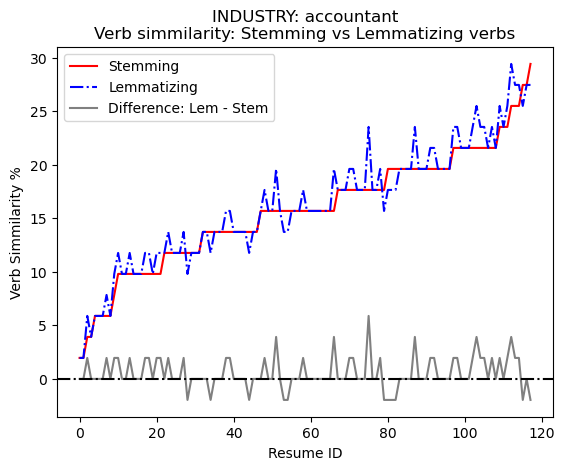

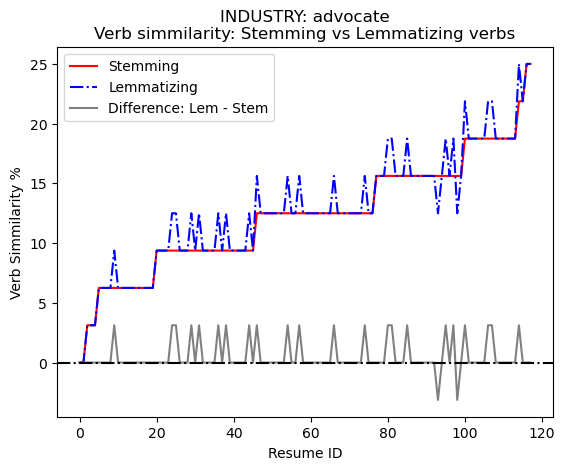

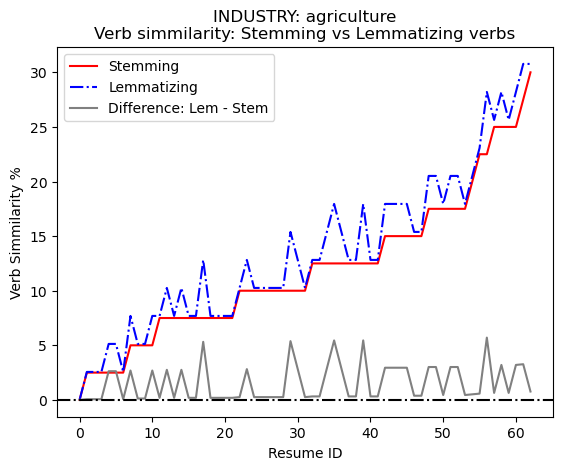

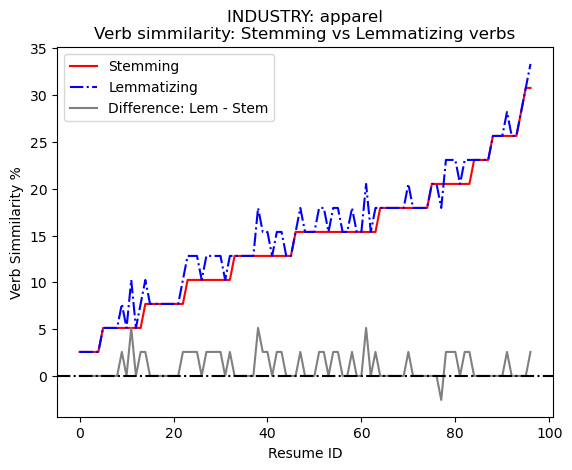

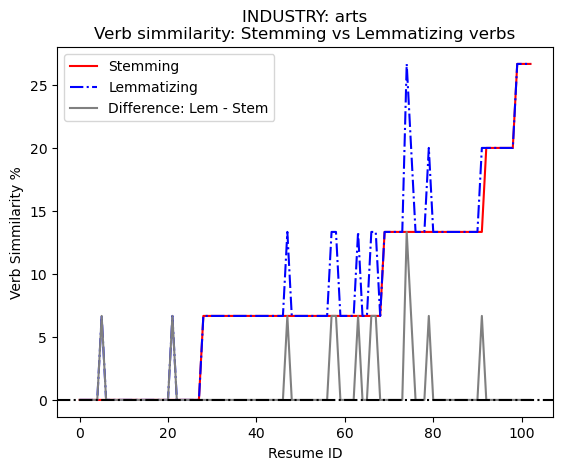

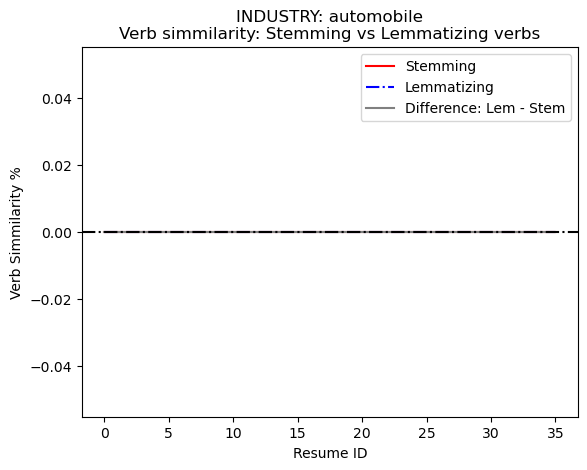

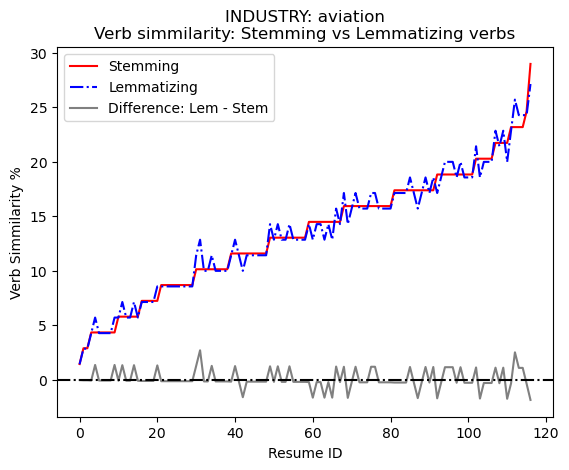

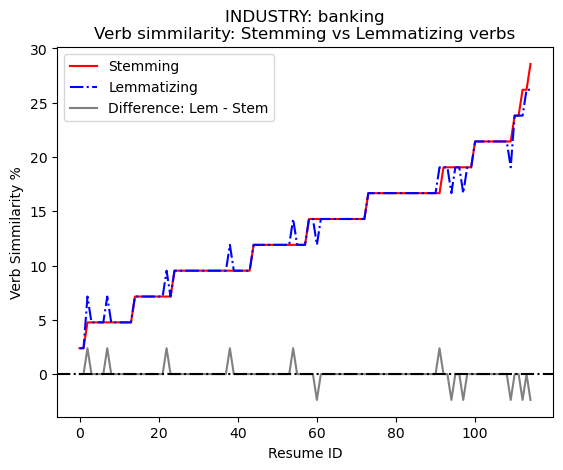

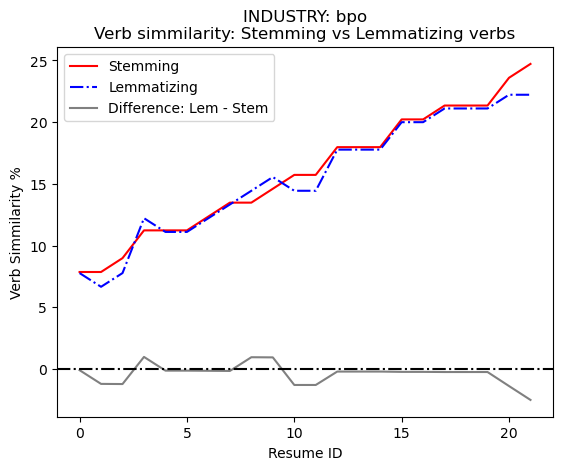

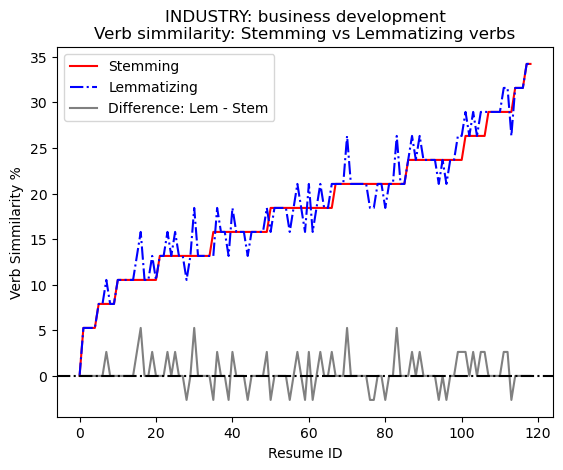

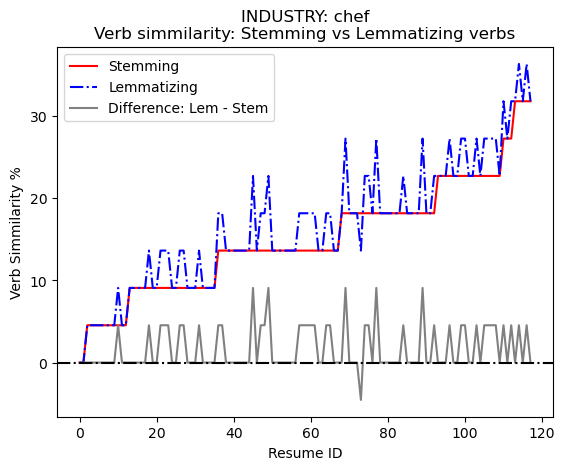

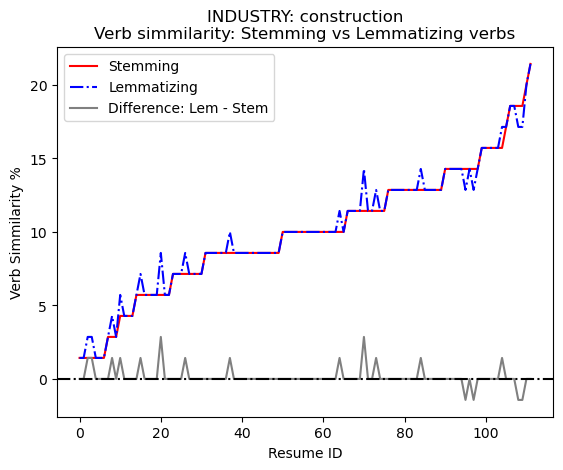

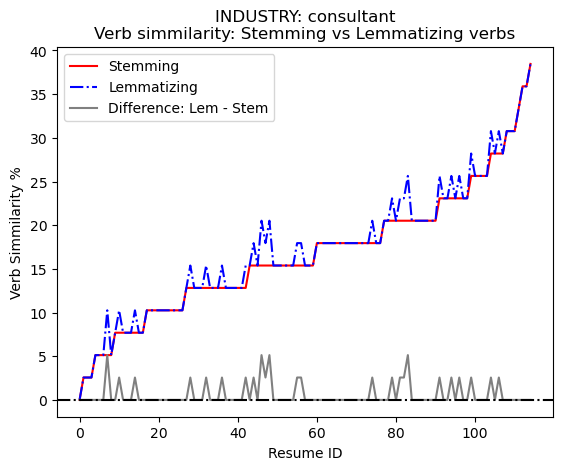

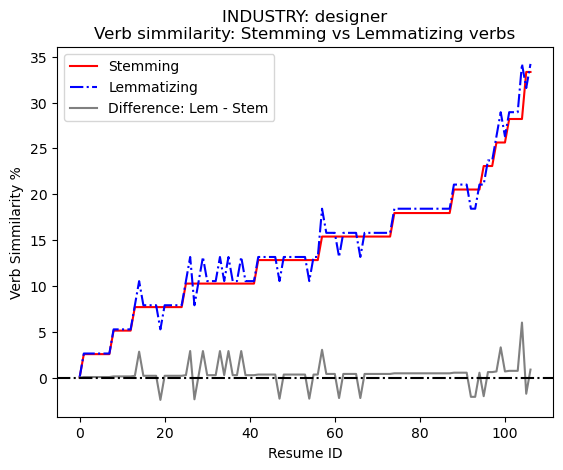

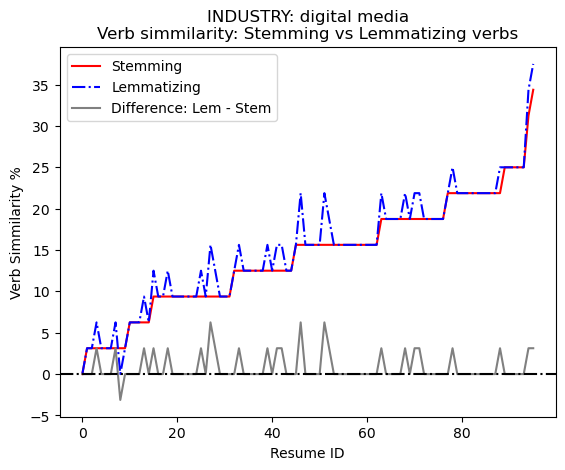

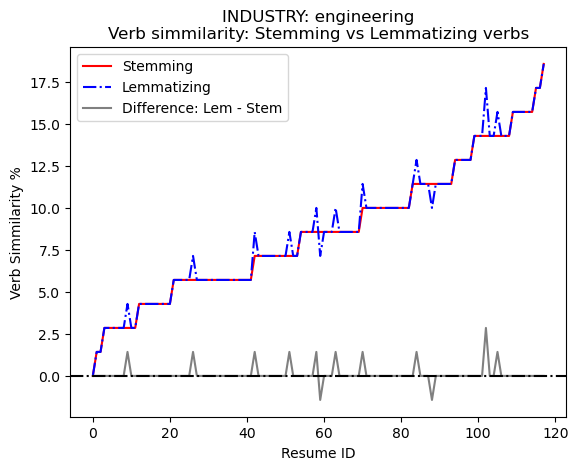

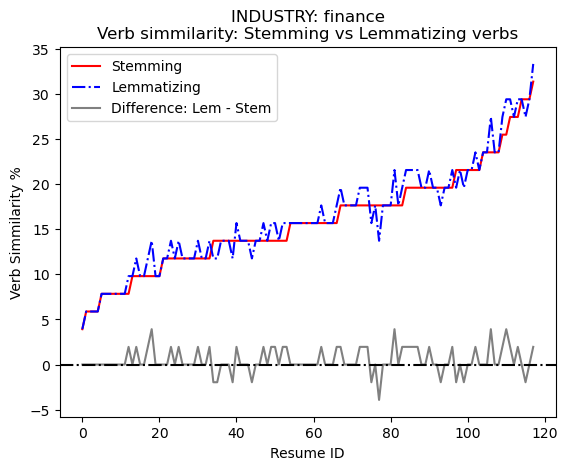

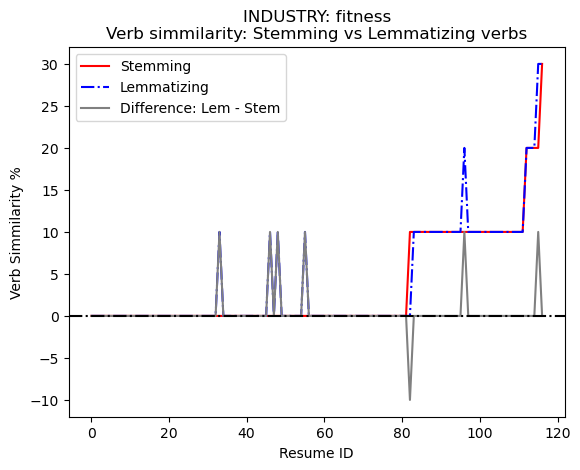

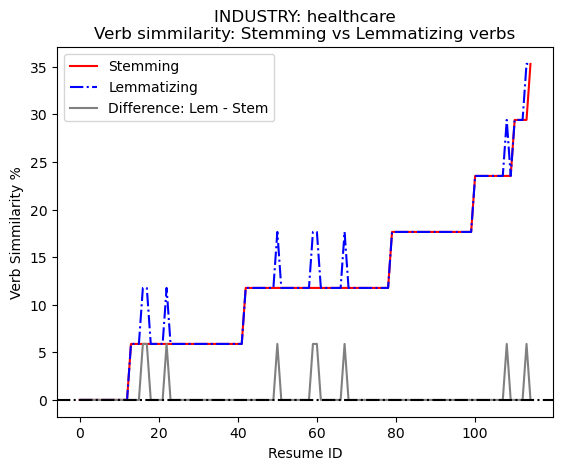

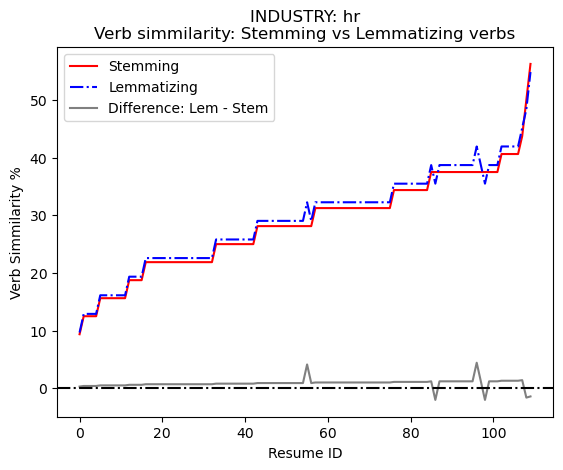

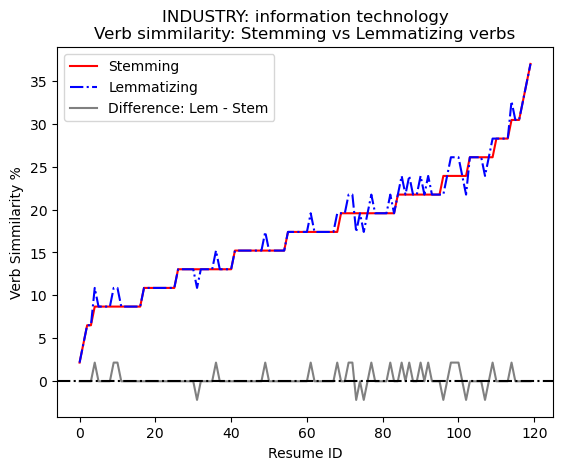

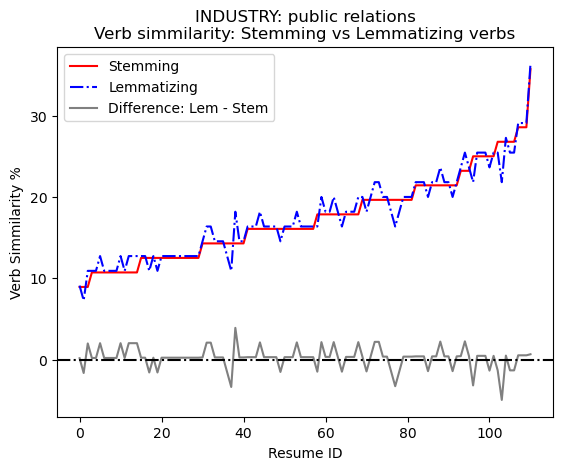

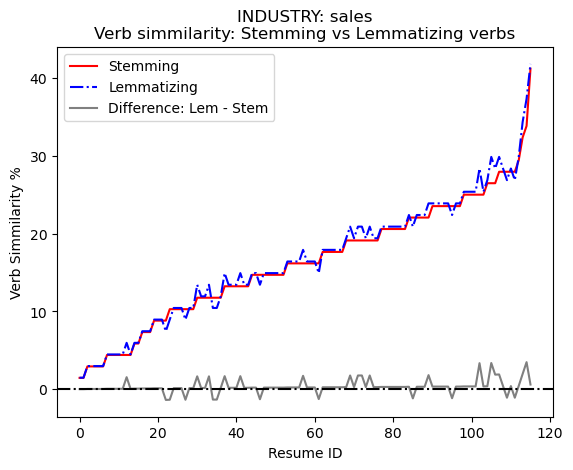

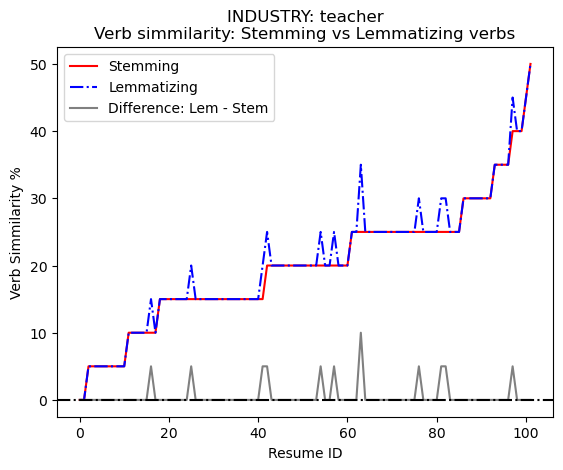

In [32]:
# Function to calculate and compare all simmilarities between 1 random industry job description and all available resumes for that industry
def compare_verb_simmilarities(df_resumes, df_jobs):
    # loop through industries
    for industry in df_resumes['profession'].unique():
        # small text change for the job description dataset
        industry_job = industry.lower().replace('-', ' ')
        # take 1 random industry job description from dataset
        job_text = df_jobs[df_jobs['search_term'] == industry_job]['description_clean'].reset_index(drop=True)[0]
        # get all resumes from that industry
        resumes = df_resumes[df_resumes['profession'] == industry]['resume_clean'].reset_index(drop=True)
        
        # get simmilarities, sort them (for best visualization) and plot the visualizations
        sims_stem, sims_lemmatize = get_verb_simmilarity_lists(job_text, resumes)
        sorted_sims = sorted(list(zip(sims_stem, sims_lemmatize)), key=lambda x: x[0])
        sorted_stem = [sim[0] for sim in sorted_sims]
        sorted_lemm = [sim[1] for sim in sorted_sims]
        plot_verb_simmilarity_comparison(sorted_stem, sorted_lemm, title='INDUSTRY: ' + industry + '\n')
            

compare_verb_simmilarities(df_resumes, df_jobs)

__From the resultant plots, we notice:__
- Overall the verb simmilarities don't change significantly with either of the 2 methods.
- The difference between verb-simmilarity using both methods (lemmatizing minus stemming) are mostly positive. This suggests that Lemmatizing verbs increases the verb simmilarity (to the job description) in most resumes.
- Few cases present negative difference, meaning that stemming has increased verb-simmilarity of those particular resume.

Based on results we decided that our project will use verb lemmatization to compare verb simmilarity (between resume-job description).

### 4. Action verbs recommendation

In the previous step we identified:
- common verbs between the resumes and job descriptions.
- lacking verbs: verbs that are present in the job description but NOT in the resume

Using this information we can __suggest__ our users possible __verbs to add__ to their resumes by using:
- identifying POS
- Synonyms (WordNet -> Synsets)

We can also __rank our synonym suggestions by using__:
- Simmilarity between words (Synsets)

In [33]:
# Let's define some random resume and job description (from same industry) to test our functions
test_resume = df_resumes['resume_clean'][0]
test_job = df_jobs['description_clean'][0]
sim, verbs_common, verbs_lack = get_verbs_simmilarity(test_resume, test_job, method='lemmatize')

% Verbs Simmilarity: 29.41
Common Verbs (trimmed):


['provide', 'identify', 'pay', 'require', 'account']

Lacking Verbs (trimmed):


['generate', 'legacy', 'assessment', 'decisionmaking', 'mrr']

In [34]:
import nltk
from nltk.corpus import wordnet

# function to get synonyms from a given word
def get_synonyms(word):
    synonyms = []
    
    # loop through the synsets of the word
    for syn in wordnet.synsets(word):
        
        # loop through the lemmas for each synset
        for lemma in syn.lemmas():
            
            # save the synonym, replacing underscores for whitespaces
            synonyms.append(lemma.name().replace('_',' '))
            
    return list(set(synonyms)) # return unique synonyms only

# function to get the synset from a word
def get_synset(word):
    # convert word into a set of chars
    word_set = set(list(word))

    # loop through synsets of the word
    for synset in wordnet.synsets(word):
        
        # extract the set of characters from the synset
        synset_set = set(list(synset.name().split('.')[0]))
        
        # if set of synset chars is contained in the word set of chars then return the synset
        if synset_set <= word_set:
            return synset
    return None

# pick one random verb from the resume lacking verbs and get their synonyms
test_verb = verbs_lack[0]
synonyms = get_synonyms(test_verb)
print("Verb:", test_verb)
print("Synonyms:")
synonyms

Verb: generate
Synonyms:


['beget',
 'generate',
 'sire',
 'yield',
 'bring forth',
 'give',
 'get',
 'render',
 'mother',
 'return',
 'engender',
 'father']

Our implemented functions allow us __to get the synonyms of a verb.__

Now let's try __ranking these synonyms by their word similarity__ with the original verb.

In [35]:
# function to find the synonyms of a word and return them ranked by simmilarity with the original word
def get_synonyms_ranked(word, print_=False):
    
    synset_word = get_synset(word) # get the synset of the word
    synonyms = get_synonyms(word) # get the synonyms of the word
    
    # loop through the synonyms
    synonyms_ranked = []
    for synonym in synonyms:
        
        # get the synset of the synonym
        synset_synonym = get_synset(synonym)
        
        # calculate the simmilarity between original word and synonym
        if synset_synonym is None:
            simmilarity = 0.0
        else:
            simmilarity = synset_word.wup_similarity(synset_synonym)
        
        # print some insights if required
        if print_:
            print("Synonym:", synonym)
            print("- Synonym Synset:", synset_synonym)
            print("- Simmilarity:", round(simmilarity, 2))
        
        # append the synonym with its simmilarity as a tuple
        if word != synonym:
            synonyms_ranked.append((synonym, simmilarity))
    
    # return synonyms sorted by simmilarity with original word
    return sorted(synonyms_ranked, key=lambda x:x[1], reverse=True)

# get the synonyms from the lacking verb, and rank them by word simmilarity with original verb from job description
get_synonyms_ranked(test_verb, print_=True)

Synonym: beget
- Synonym Synset: Synset('beget.v.01')
- Simmilarity: 0.33
Synonym: generate
- Synonym Synset: Synset('generate.v.01')
- Simmilarity: 1.0
Synonym: sire
- Synonym Synset: Synset('sire.n.01')
- Simmilarity: 0.14
Synonym: yield
- Synonym Synset: Synset('yield.n.03')
- Simmilarity: 0.17
Synonym: bring forth
- Synonym Synset: None
- Simmilarity: 0.0
Synonym: give
- Synonym Synset: Synset('give.n.01')
- Simmilarity: 0.18
Synonym: get
- Synonym Synset: Synset('get.n.01')
- Simmilarity: 0.12
Synonym: render
- Synonym Synset: Synset('render.n.01')
- Simmilarity: 0.17
Synonym: mother
- Synonym Synset: Synset('mother.n.01')
- Simmilarity: 0.13
Synonym: return
- Synonym Synset: Synset('return.n.02')
- Simmilarity: 0.17
Synonym: engender
- Synonym Synset: Synset('engender.v.01')
- Simmilarity: 0.29
Synonym: father
- Synonym Synset: Synset('father.n.01')
- Simmilarity: 0.13


[('beget', 0.3333333333333333),
 ('engender', 0.2857142857142857),
 ('give', 0.18181818181818182),
 ('yield', 0.16666666666666666),
 ('render', 0.16666666666666666),
 ('return', 0.16666666666666666),
 ('sire', 0.14285714285714285),
 ('mother', 0.13333333333333333),
 ('father', 0.13333333333333333),
 ('get', 0.11764705882352941),
 ('bring forth', 0.0)]

Our final function returns a list of tuples (synonym, simmilarity) __sorted by the simmilarities.__

With this function we can successfully recommend the user other possible verbs to add on their resumes.

### 5. Keywords simmilarity

We will proceed with one of the most important features of the project, keyword extraction from the job descriptions.

To achieve this we will use the following techniques:
- __POS tagging__
- __Named Entity recognition__
- __Word Collocations: Bigrams__ (based on PMI)
- __Word Collocations: Trigrams__ (based on PMI)

However, to detect keywords we need the upper cases untouched. We will create another column of our texts (job desc. and resumes) but without changing upper cases.

In [36]:
# get another version of the job descriptions without changing upper cases
df_jobs['description_upper'] = clean_text_column(df_jobs, 'description', lowercase=False)
df_jobs[['description_upper', 'search_term']]

,description_upper,search_term
0,us MRR proud essential services technologies d...,accountant
1,Job Req ID Department Cash Management Investme...,accountant
2,Work Location Toronto Ontario Canada Hours Lin...,accountant
3,Reporting Chief Financial Officer Principals C...,accountant
4,Imagine part team human connection underlies e...,accountant
...,...,...
13541,CONTRACT temporary position less year SUMMARY ...,data analyst
13542,seeking skilled SQL Developer BI Business Inte...,data analyst
13543,Business Analyst work intersection Finance Ope...,data analyst
13544,Data Analyst Investment Data Analytics Connor ...,data analyst


In [37]:
# get another version of the resumes without changing upper cases
df_resumes['resume_upper'] = clean_text_column(df_resumes, 'resume', lowercase=False)
df_resumes[['resume_upper', 'profession']]

,resume_upper,profession
0,ACCOUNTANT Summary Financial Accountant specia...,accountant
1,STAFF ACCOUNTANT Summary Highly analytical det...,accountant
2,ACCOUNTANT Professional Summary obtain positio...,accountant
3,SENIOR ACCOUNTANT Experience Company Name June...,accountant
4,SENIOR ACCOUNTANT Professional Summary Senior ...,accountant
...,...,...
2479,READING TEACHER Summary highly motivated educa...,teacher
2480,HISTORY TEACHER Professional Summary employed ...,teacher
2481,TEACHER Summary Highly ethical dependable dili...,teacher
2482,TEACHER Summary Talented early education profe...,teacher


__Identifying keywords by named entity recognition.__

In [38]:
from nltk import sent_tokenize

# function to extract the keywords form a text, returns a list of Trees from NLTK
def get_named_entities(text):
    sentences = sent_tokenize(text) # sentence tokenization
    tokens = [word_tokenize(sent) for sent in sentences] # word tokenize each sentence
    tags = [nltk.pos_tag(sent) for sent in tokens] # pos tagging each word
    chunks = nltk.ne_chunk_sents(tags, binary=True) # set named entity chunks
    named_entities = []
    for sent in chunks: # save named entities from text if they are labeled NE
        for chunk in sent:
            if hasattr(chunk, "label") and chunk.label() == 'NE':
                named_entities.append(chunk)
    return named_entities

In [39]:
# select a random job description to test our functions
test_job = df_jobs['description_upper'][12000]
test_job[:100] # show first 100 characters

'Union USW Local Job Opportunity Information Technology Services Posting Date April Closing Date Apri'

In [40]:
# test our named entity extraction function
named_entities = get_named_entities(test_job)
named_entities

[Tree('NE', [('Union', 'NNP')]),
 Tree('NE', [('Schedule', 'NNP'), ('Fulltime', 'NNP'), ('Victoria', 'NNP'), ('University', 'NNP')]),
 Tree('NE', [('University', 'NNP')]),
 Tree('NE', [('SLGBTQI', 'NNP')]),
 Tree('NE', [('Human', 'NNP'), ('Resources', 'NNPS'), ('Department', 'NNP')]),
 Tree('NE', [('Interim', 'NNP')]),
 Tree('NE', [('SQL', 'NNP'), ('Server', 'NNP')]),
 Tree('NE', [('Victoria', 'NNP'), ('University', 'NNP')]),
 Tree('NE', [('Computer', 'NNP'), ('Science', 'NNP'), ('Software', 'NNP')]),
 Tree('NE', [('HTML', 'NNP')]),
 Tree('NE', [('AODA', 'NNP'), ('Experience', 'NNP')]),
 Tree('NE', [('SQL', 'NNP'), ('Server', 'NNP')]),
 Tree('NE', [('SQL', 'NNP')]),
 Tree('NE', [('Events', 'NNP'), ('Management', 'NNP'), ('Catering', 'NNP')]),
 Tree('NE', [('Demonstrated', 'NNP')]),
 Tree('NE', [('DUTIES', 'NNP'), ('Application', 'NNP')]),
 Tree('NE', [('RESTful', 'NNP')]),
 Tree('NE', [('Ability', 'NNP')]),
 Tree('NE', [('Participate', 'NNP')]),
 Tree('NE', [('Keep', 'NNP')]),
 Tree('N

In [41]:
# function to further process our named entities
def process_named_entities(nes, tags=['NNP', 'NNPS']):
    # loop through the named entities passed as parameters
    named_entities = []
    for ne in nes:
        
        # filter only those named entitites that are tagged same as the parameter 'tags'
        named_entity = [word[0] for word in ne if word[1] in tags]
        
        # from the remaining parts of the named entity, joined them as a single string (e.g. 'Barack Obama')
        named_entity = ' '.join(named_entity)
        
        # if the resultant named entity is an empty string discard them, otherwise save it
        if named_entity == "": continue
        named_entities.append(named_entity)
    
    # return unique named entities sorted in alphabetical order
    return sorted(list(set(named_entities)))

process_named_entities(named_entities, 'NNP')

['AODA Experience',
 'APPLY Internal',
 'Ability',
 'Apply Victoria University',
 'Computer Science Software',
 'DUTIES Application',
 'Dayforce Please',
 'Demonstrated',
 'Events Management Catering',
 'HTML',
 'Human Department',
 'Interim',
 'Internal Opportunities',
 'Keep',
 'Participate',
 'RESTful',
 'SLGBTQI',
 'SQL',
 'SQL Server',
 'Schedule Fulltime Victoria University',
 'Union',
 'University',
 'Victoria University']

__Identifying keywords with Bigram and Trigram word collocations__,

__using both metrics PMI and Likelihood Ratio.__

In [42]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

# class in charge of retrieving bigrams and trigrams from a text based on likelihood ratio metric
class NGramsFinder:
    def get_top_n_bigrams(self, text, n, metric='pmi'):
        '''
            function: get_top_n_bigrams -> finds the top n number of bigrams 
            arg: text (str) -> text to find the bigrams 
                 n (int) -> number of bigrams to find
            return: (list) -> list of tuples containg bigrams
        '''
        tokens = word_tokenize(text) # tokenize text
        bcf = BigramCollocationFinder.from_words(tokens) # instantiate bigram finder
        
        # return best n number of bigrams based on metric
        if metric == 'pmi':
            return bcf.nbest(BigramAssocMeasures.pmi, n)
        elif metric == 'likelihood':
            return bcf.nbest(BigramAssocMeasures.likelihood_ratio, n)
    
    def get_top_n_trigrams(self, text, n, metric='pmi'):
        '''
            function: get_top_n_trigrams -> finds the top n number of trigrams 
            arg: text (str) -> text to find the trigrams 
                 n (int) -> number of bigrams to find
            return: (list) -> list of tuples containg trigrams
        '''
        tokens = word_tokenize(text) # tokenize text
        tcf = TrigramCollocationFinder.from_words(tokens) # instantiate trigram finder
        
        # return best n number of trigrams based on metric
        if metric == 'pmi':
            return tcf.nbest(TrigramAssocMeasures.pmi, n)
        elif metric == 'likelihood':
            return tcf.nbest(TrigramAssocMeasures.likelihood_ratio, n)

In [43]:
# test our bigram finder
ngf = NGramsFinder()
print("Bigrams (top 5) using LIKELIHOOD RATIO:")
display(ngf.get_top_n_bigrams(test_job, 5, metric='likelihood'))
print("Brigrams (top 5) using PMI:")
display(ngf.get_top_n_bigrams(test_job, 5, metric='pmi'))

Bigrams (top 5) using LIKELIHOOD RATIO:


[('Victoria', 'University'),
 ('Information', 'Technology'),
 ('Technology', 'Services'),
 ('Date', 'April'),
 ('Management', 'Catering')]

Brigrams (top 5) using PMI:


[('APIs', 'seamless'),
 ('AgileScrum', 'methodologies'),
 ('Appointment', 'Type'),
 ('Bachelor', '’'),
 ('Collaborate', 'crossfunctional')]

In [44]:
# test our trigrams finder
ngf = NGramsFinder()
print("Trigrams (top 5) using LIKELIHOOD RATIO:")
display(ngf.get_top_n_trigrams(test_job, 5, metric='likelihood'))
print("Trigrams (top 5) using PMI:")
display(ngf.get_top_n_trigrams(test_job, 5, metric='pmi'))

Trigrams (top 5) using LIKELIHOOD RATIO:


[('Information', 'Technology', 'Services'),
 ('Apply', 'Victoria', 'University'),
 ('Fulltime', 'Victoria', 'University'),
 ('SUMMARY', 'Victoria', 'University'),
 ('Victoria', 'University', 'REQUIRED')]

Trigrams (top 5) using PMI:


[('APIs', 'seamless', 'integration'),
 ('Appointment', 'Type', 'Contract'),
 ('Bachelor', '’', 'degree'),
 ('Computer', 'Science', 'Software'),
 ('Customer', 'service', 'focused')]

With this particular job description we get better results using PMI. 

However, we have to test with multiple job descriptions.

To __compare the keyword simmilarity__ between resume and job description

we will __define a function to compare any simmilarity (named entity, bigram, or trigram)__.

So that we can compare results and make conclusions.

In [45]:
# function to calculate keyword simmilarity between 2 texts
def get_simmilarity(text_resume, text_job, method='named_entity', ngram_metric='pmi', ngram_terms=15, print_=True):
    # extract keywords (named entities, bigram, or trigram) from text
    if method == 'named_entity':
        keywords_resume = process_named_entities(get_named_entities(text_resume))
        keywords_job = process_named_entities(get_named_entities(text_job))
    elif method == 'bigram':
        ngf = NGramsFinder()
        keywords_resume = ngf.get_top_n_bigrams(text_resume, ngram_terms, metric = ngram_metric)
        keywords_job = ngf.get_top_n_bigrams(text_job, ngram_terms, metric = ngram_metric)
    elif method == 'trigram':
        ngf = NGramsFinder()
        keywords_resume = ngf.get_top_n_trigrams(text_resume, ngram_terms, metric = ngram_metric)
        keywords_job = ngf.get_top_n_trigrams(text_job, ngram_terms, metric = ngram_metric)
    
    # get common keywords between both texts
    keywords_common = [keyword for keyword in keywords_resume if keyword in keywords_job]
    
    # get lacking keywords (present in job description, but not in resume)
    keyword_lacking = [keyword for keyword in keywords_job if keyword not in keywords_resume]
    
    # calculate, print, and return simmilarity; avoid the division by 0 in case there's no keywords in the job description
    simmilarity = 0 if len(keywords_job) == 0 else len(keywords_common) * 100 / len(keywords_job)
    
    # print insights if required
    if print_: 
        print("% Keywords Simmilarity: {:.2f}".format(simmilarity))
        print("Common Keywords (trimmed):")
        display(keywords_common[:5])
        print("Lacking Keywords (trimmed):")
        display(keyword_lacking[:5])
    return simmilarity, keywords_common, keyword_lacking

In [46]:
# select a random resume & job description from same industry to test our functions
test_job = df_jobs['description_upper'][9570]
test_resume = df_resumes['resume_upper'][2070]
print("Job Description (trimmed):\n- ", test_job[:100])
print("Resume (trimmed):\n- ", test_resume[:100])

Job Description (trimmed):
-  Role name Azure Solution Architect Toronto Hybrid Long Term Contract Key Skills Required Data Framew
Resume (trimmed):
-  INFORMATION TECHNOLOGY SPECIALIST INFORMATION SECURITY OFFICER Profile blah blah Core Qualifications


In [47]:
# test our named entity simmilarity
_ = get_simmilarity(test_resume, test_job, method='named_entity')

% Keywords Simmilarity: 7.69
Common Keywords (trimmed):


['SQL']

Lacking Keywords (trimmed):


['ADF',
 'Azure Solution Architect Toronto Hybrid Long Term Contract Key Skills Required Data Frameworks',
 'Databricks Delta Live',
 'Hadoop Spark Kafka',
 'Informatica Experience']

In [48]:
# test our bigram simmilarity
_ = get_simmilarity(test_resume, test_job, method='bigram', ngram_metric='pmi')

% Keywords Simmilarity: 0.00
Common Keywords (trimmed):


[]

Lacking Keywords (trimmed):


[('ADF', 'ADLS'),
 ('ADLS', 'Gen'),
 ('ANA', 'Apptozacom'),
 ('Apptozacom', 'Email'),
 ('Architect', 'Toronto')]

In [49]:
# test our trigram simmilarity
_ = get_simmilarity(test_resume, test_job, method='trigram', ngram_metric='pmi')

% Keywords Simmilarity: 0.00
Common Keywords (trimmed):


[]

Lacking Keywords (trimmed):


[('ADF', 'ADLS', 'Gen'),
 ('ANA', 'Apptozacom', 'Email'),
 ('Apptozacom', 'Email', 'ana'),
 ('Architect', 'Toronto', 'Hybrid'),
 ('Contract', 'Key', 'Skills')]

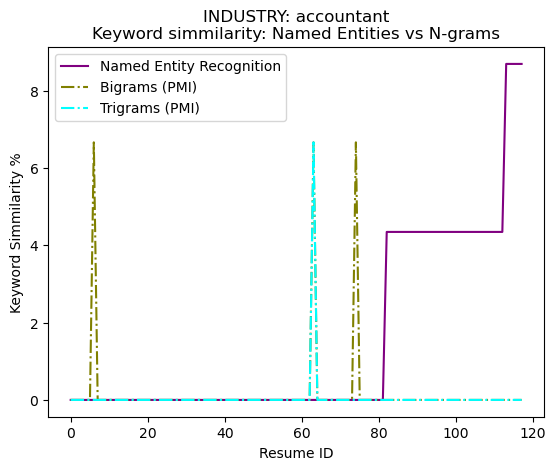

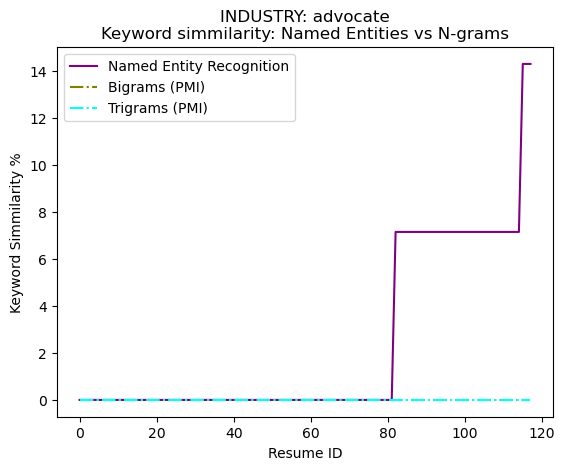

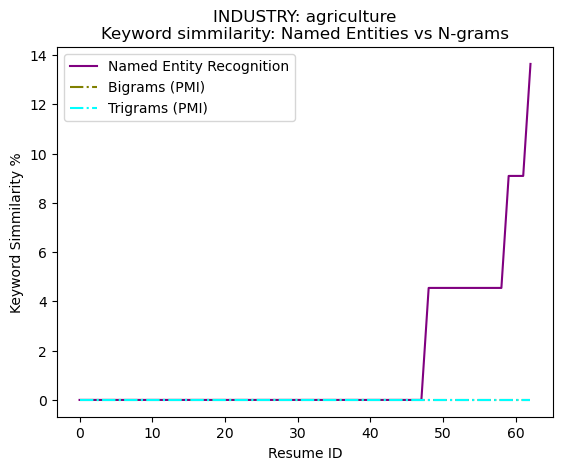

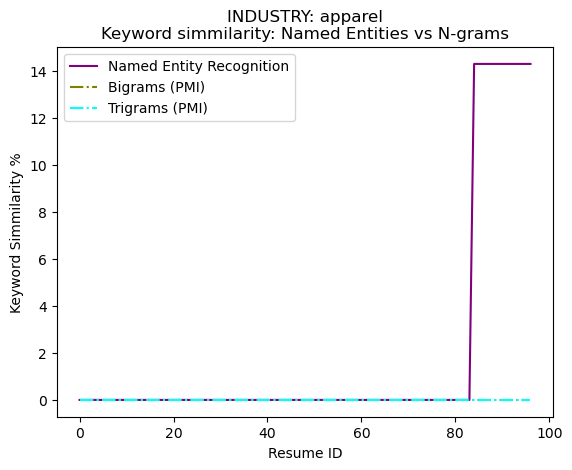

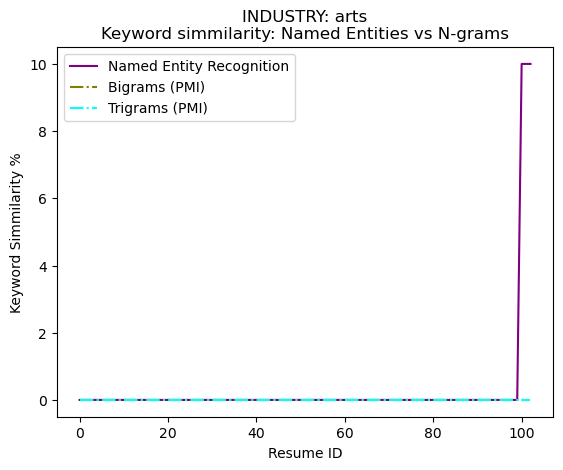

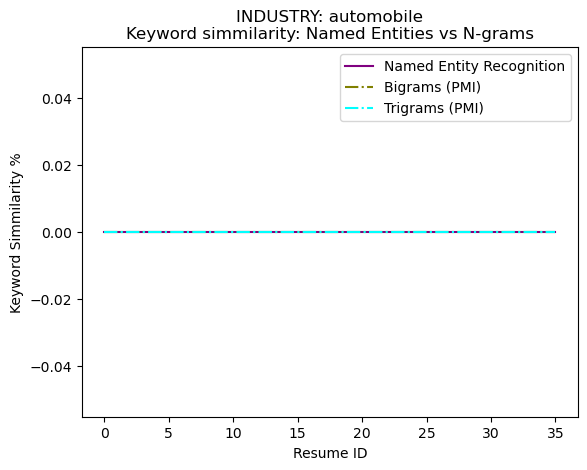

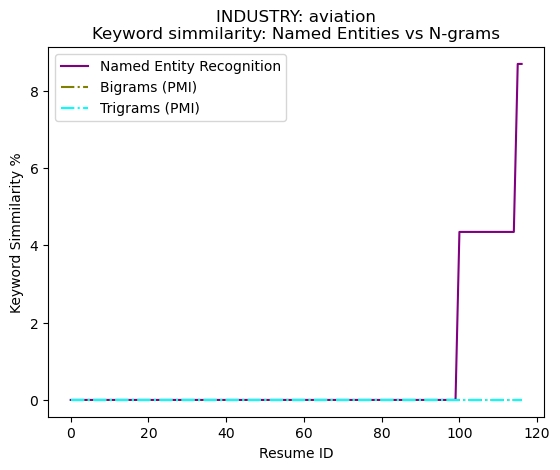

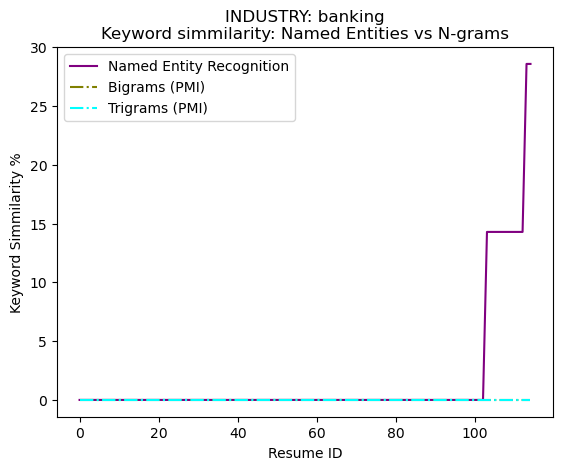

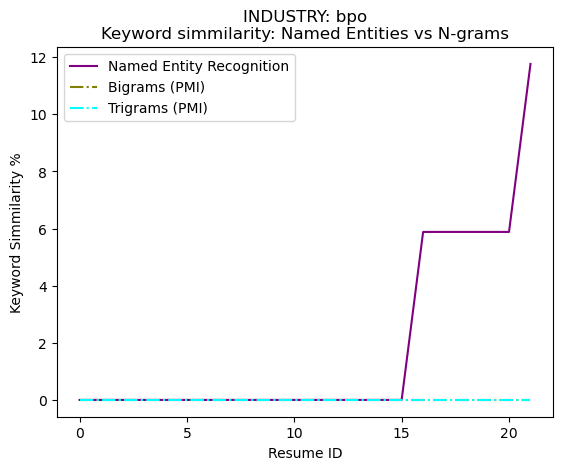

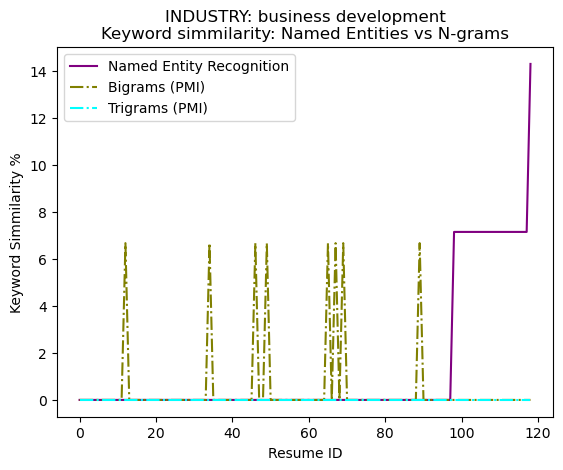

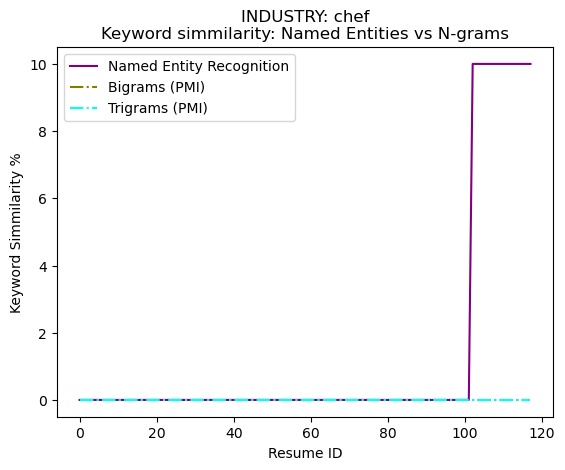

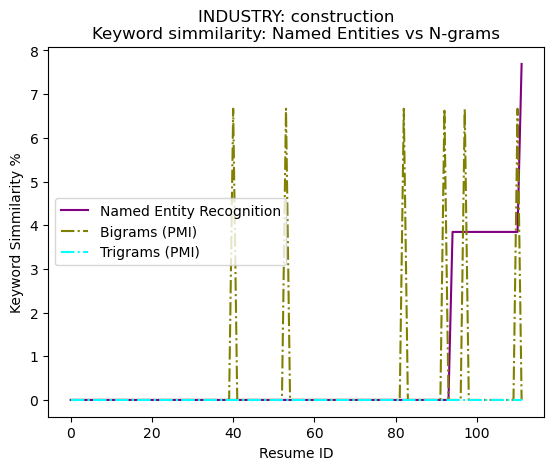

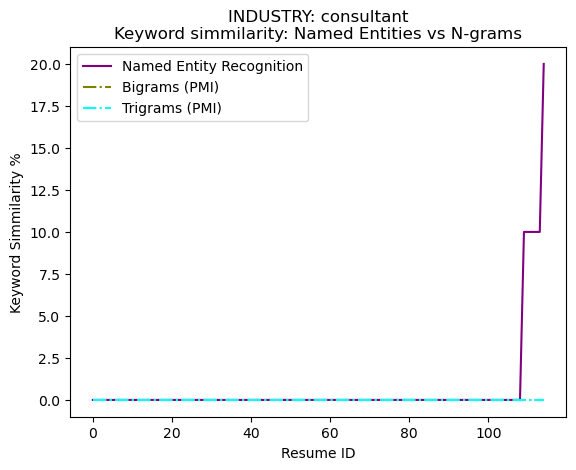

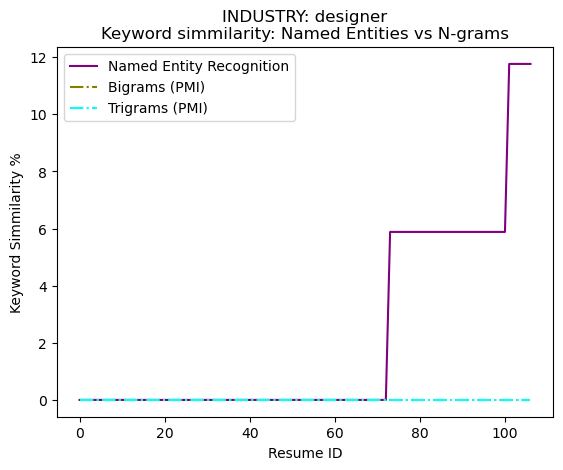

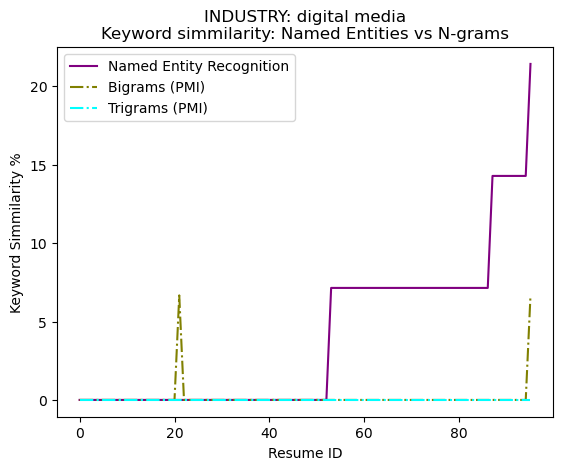

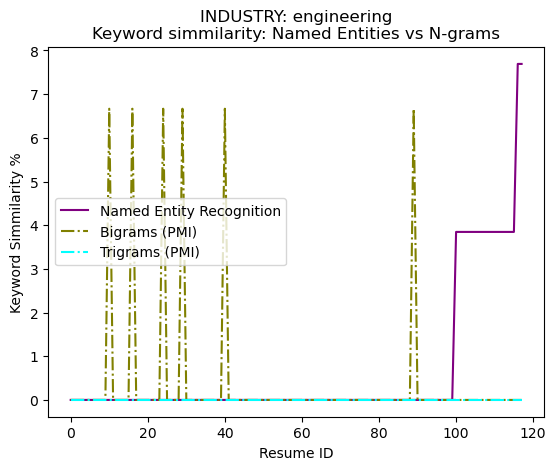

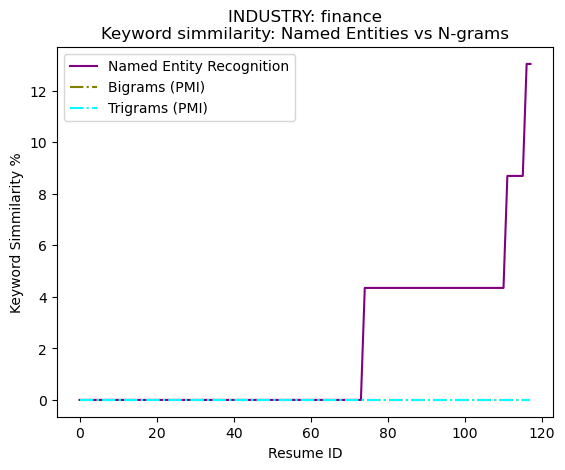

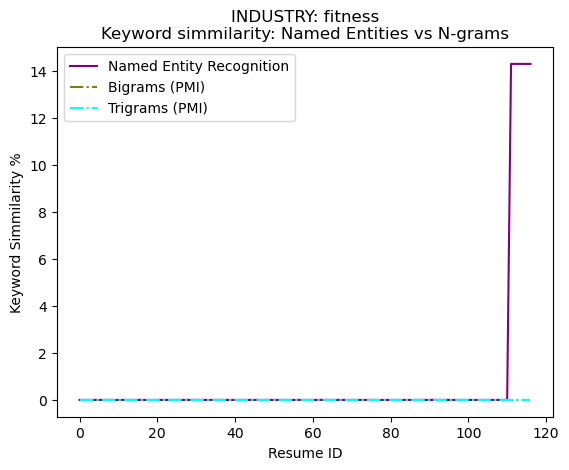

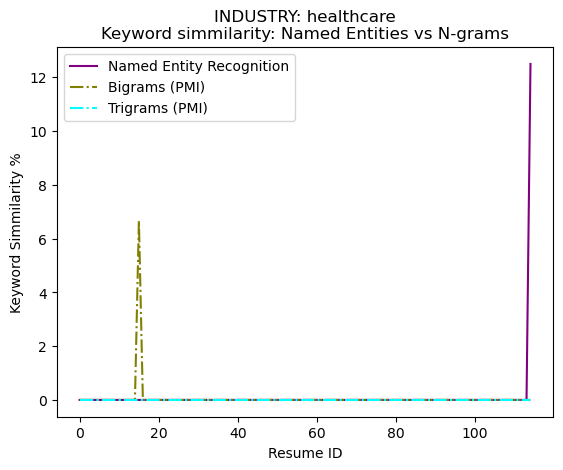

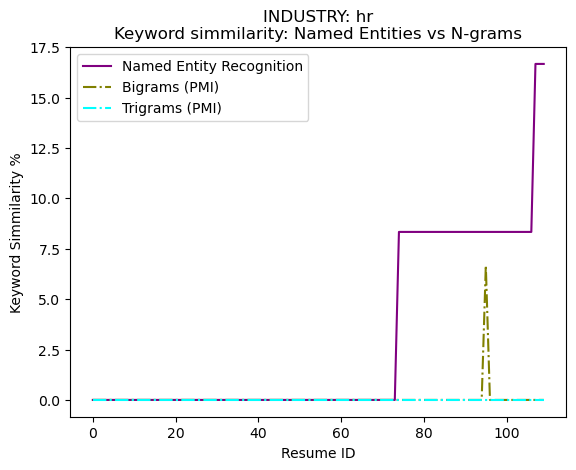

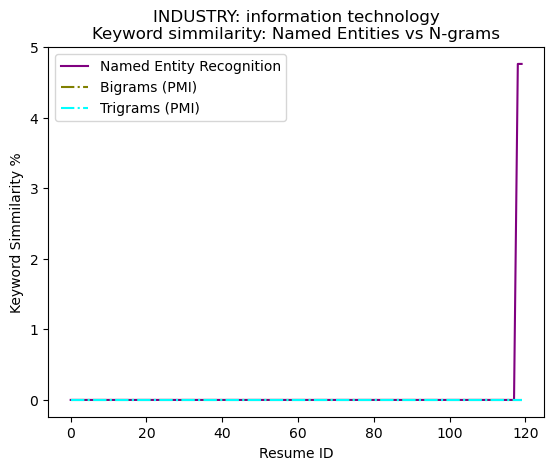

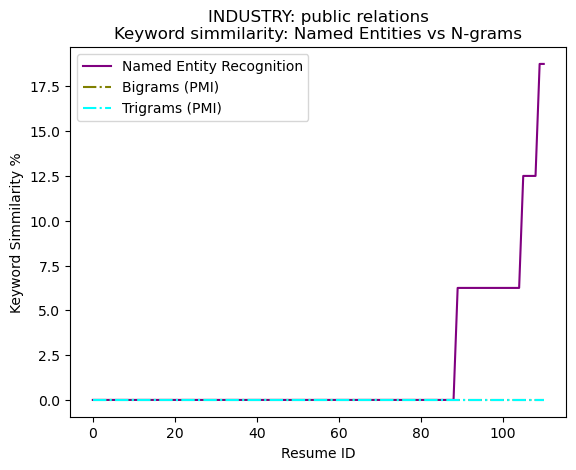

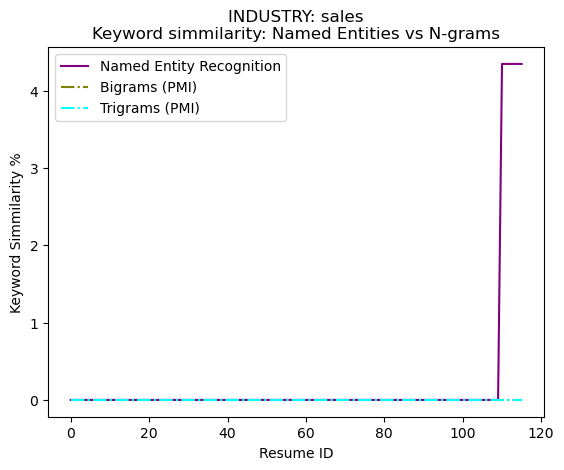

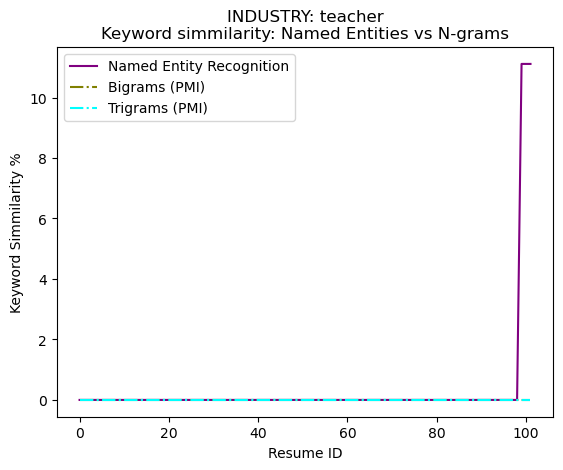

In [50]:
# Function to calculate the simmilarity between a job description text and a list of resumes
def get_simmilarity_lists(job_text, resumes):
    # calculate simmilarities using named entity recognition, bigram-trigram word collocations
    sims_named, sims_bigrams, sims_trigrams = [], [], []
    
    # loop through each resume
    for resume_text in resumes:
        # calculate verb simmilarities and save values
        sim_named, _, _ = get_simmilarity(resume_text, job_text, method='named_entity', print_=False)
        sim_bigram, _, _ = get_simmilarity(resume_text, job_text, method='bigram', print_=False)
        sim_trigram, _, _ = get_simmilarity(resume_text, job_text, method='trigram', print_=False)
        sims_named.append(sim_named)
        sims_bigrams.append(sim_bigram)
        sims_trigrams.append(sim_trigram)
    
    # return lists of simmilarities using each method
    return sims_named, sims_bigrams, sims_trigrams

# Function to plot the simmilarity lines
def plot_simmilarity_comparison(sims_named, sims_bigrams, sims_trigrams, title=''):
    # plot lines simmilarities (named entity, bigram, trigram)
    plt.plot(sims_named, color='purple', label='Named Entity Recognition')
    plt.plot(sims_bigrams, '-.', color='olive', label='Bigrams (PMI)')
    plt.plot(sims_trigrams, '-.', color='cyan', label='Trigrams (PMI)')
    plt.title(title + "Keyword simmilarity: Named Entities vs N-grams")
    plt.xlabel("Resume ID")
    plt.ylabel("Keyword Simmilarity %")
    plt.legend()
    plt.show()

# Function to calculate and compare all simmilarities between 1 random industry job description and all available resumes for that industry
def compare_keyword_simmilarities(df_resumes, df_jobs):
    # loop through industries
    for industry in df_resumes['profession'].unique():
        # take 1 random industry job description from dataset
        job_text = df_jobs[df_jobs['search_term'] == industry]['description_upper'].reset_index(drop=True)[0]
        # get all resumes from that industry
        resumes = df_resumes[df_resumes['profession'] == industry]['resume_upper'].reset_index(drop=True)
        
        # get simmilarities, sort them (for best visualization) and plot the visualizations
        sims_named, sims_bigrams, sims_trigrams = get_simmilarity_lists(job_text, resumes)
        sorted_sims = sorted(list(zip(sims_named, sims_bigrams, sims_trigrams)), key=lambda x: x[0])
        sorted_named = [sim[0] for sim in sorted_sims]
        sorted_bigrams = [sim[1] for sim in sorted_sims]
        sorted_trigrams = [sim[2] for sim in sorted_sims]
        plot_simmilarity_comparison(sorted_named, sorted_bigrams, sorted_trigrams, title='INDUSTRY: ' + industry + '\n')
            

compare_keyword_simmilarities(df_resumes, df_jobs)

From the resultant plots:
- Most industries are showing high keyword simmilarity (resume vs job description) using __named entity recognition__.
- When using __bigrams with PMI metric__ we get some interesting pikes suggesting that it could increase keyword simmilarity for certain resumes.
- However, when using __trigrams with PMI metric__ we get nearly 0% keyword simmilarity for most resumes from all industries. This may be due to the low probability of 3 consecutive words being repeated on both texts.

We will use __name entity__ as our keyword extraction approach. However, __showing the top bigrams and trigrams from the job description__ could be an interesting feature to the user for our final product.

### 6. Correcting spelling errors from resume

Another important feature for our tool is to correct spelling errors from the input resume __without affecting keywords (named entities)__.

To achieve this we try 2 approaches:
- __Speller class (autocorrect library)__
- __suggest function (pattern library)__

For this step we will need to work with the unclean (original) resume texts.

In [51]:
# retrieve one random resume on their original raw text format
test_resume = df_resumes['resume'][100]
test_resume[:100]

'ACCOUNTANT\nSummary\nPersonable education professional driven to inspire students to achieve personal '

In [52]:
from autocorrect import Speller

# function to correct spelling errors from text using 1st approach
def revise_text_using_speller(text, named_entities, print_=False):
    # tokenize input text
    tokens = word_tokenize(text)
    
    # decompose the named entities into a list of single words
    named_ents = []
    for named_entity in named_entities:
        named_ents += named_entity.split(' ')
    
    # instantiate speller class for English usage
    spell = Speller(lang='en')
    
    # loop through words and count number of corrections
    number_revisions = 0
    for i, word in enumerate(tokens):
        
        # revise the word only if it's not in the named entities and not all capitalized
        if word.isupper() or word in named_ents:
            continue
        revised_word = spell(word)
        
        # if word was corrected, increase counter and replace token
        if revised_word != word:
            number_revisions += 1
            tokens[i] = revised_word
            
            if print_: # print insights if required
                print(f"{word} --> {revised_word}")
    
    # return both number of corrections made and the revised text in tokens format
    if print_: print(f"- TOTAL CORRECTIONS: {number_revisions} -")
    return number_revisions, ' '.join(tokens)

named_entities = process_named_entities(get_named_entities(test_resume))
_ = revise_text_using_speller(test_resume, named_entities, print_=True)

Personable --> Personal
requisitions --> acquisitions
Audits --> Audit
reconciliations --> reconciliation
Organizes --> Organized
QA/Mobile --> A/Mobile
requisitions --> acquisitions
requisitions --> acquisitions
integrations --> integration
expedited --> expedite
Coordinated --> Coordinates
Coordinated --> Coordinates
reconciliations --> reconciliation
- TOTAL CORRECTIONS: 13 -


In [54]:
from pattern.en import suggest

# function to correct spelling errors from text using 2nd approach
def revise_text_using_suggest(text, named_entities, threshold=0.6, print_=False):
    # tokenize input text
    tokens = word_tokenize(text)
    
    # decompose the named entities into a list of single words
    named_ents = []
    for named_entity in named_entities:
        named_ents += named_entity.split(' ')
    
    # loop through words and count number of corrections
    number_revisions = 0
    for i, word in enumerate(tokens):
        
        # revise the word only if it's not in the named entities and not all capitalized
        if word.isupper() or word in named_ents:
            continue
        
        # find possible word suggestions
        suggestions = suggest(word)
        suggestions_words = [word[0] for word in suggestions]
        
        # if there are no suggestions, the original word is within the suggestions
        # or if the best suggestion metric is below certain threshold, then skip the correction
        if len(suggestions_words) == 0 or word in suggestions_words or suggestions[0][1] < threshold:
            continue
        revised_word = suggestions_words[0]
        
        # if word was corrected, increase counter and replace token
        if revised_word != word:
            number_revisions += 1
            tokens[i] = revised_word
            
            if print_: # print insights if required
                print(f"{word} --> ('{suggestions[0][0]}', {round(suggestions[0][1], 2)})")
    
    # return both number of corrections made and the revised text in tokens format
    if print_: print(f"- TOTAL CORRECTIONS: {number_revisions} -")
    return number_revisions, ' '.join(tokens)

named_entities = process_named_entities(get_named_entities(test_resume))
_ = revise_text_using_suggest(test_resume, named_entities, print_=True)

Personable --> ('Reasonable', 0.97)
Highlights --> ('Highlight', 1.0)
vendors --> ('vendor', 1.0)
inventory --> ('inventor', 0.6)
randomly --> ('random', 1.0)
Performs --> ('Perform', 0.68)
processed --> ('processes', 0.85)
demographic --> ('geographic', 1.0)
maximize --> ('minimize', 1.0)
Completes --> ('Complete', 0.85)
reconciliations --> ('reconciliation', 1.0)
Organizes --> ('Organized', 0.88)
Tester --> ('Fester', 1.0)
Audited --> ('United', 0.96)
localization --> ('localisation', 1.0)
releases --> ('release', 0.64)
regression --> ('repression', 1.0)
vendors --> ('vendor', 1.0)
vendors --> ('vendor', 1.0)
audits --> ('audit', 1.0)
Ensured --> ('Insured', 1.0)
vendors --> ('vendor', 1.0)
implementations --> ('implementation', 1.0)
integrations --> ('integration', 1.0)
trainings --> ('training', 1.0)
opting --> ('outing', 1.0)
efficiencies --> ('deficiencies', 1.0)
expedited --> ('expedite', 1.0)
Coordinated --> ('Coordinate', 0.83)
itinerary --> ('itinerant', 1.0)
Coordinated --> 

We have succesfully __implemented 2 methods to correct spelling errors within resumes__.

Let's __compare them__ using a bunch of resumes.

Due to the __high time complexity__ of the spell-correction approaches, we will test on 40 resume only (from 1 single industry).

Resume 1/20
Resume 2/20
Resume 3/20
Resume 4/20
Resume 5/20
Resume 6/20
Resume 7/20
Resume 8/20
Resume 9/20
Resume 10/20
Resume 11/20
Resume 12/20
Resume 13/20
Resume 14/20
Resume 15/20
Resume 16/20
Resume 17/20
Resume 18/20
Resume 19/20
Resume 20/20


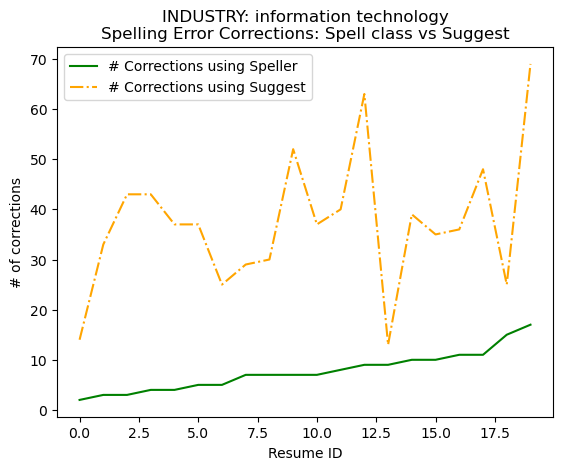

In [55]:
# Function to calculate the simmilarity between a job description text and a list of resumes
def get_spell_correction_lists(resumes):
    # calculate number of corrections using both methods
    speller_results, suggest_results = [], []
    
    # loop through each resume
    for i, resume_text in enumerate(resumes):
        # print progress due to high time complexity
        print(f"Resume {i+1}/{len(resumes)}")
        
        # extract named entities from resume
        named_entities = process_named_entities(get_named_entities(resume_text))
        
        # calculate the number of corrections within the resume
        speller_corrections, _ = revise_text_using_speller(resume_text, named_entities)
        suggest_corrections, _ = revise_text_using_suggest(resume_text, named_entities)
        speller_results.append(speller_corrections)
        suggest_results.append(suggest_corrections)
    
    # return lists of # corrections from both methods
    return speller_results, suggest_results

# Function to plot the number of corrections using both methods
def plot_spelling_corrections(speller_results, suggest_results, title_prefix=''):
    # plot lines and set labels
    plt.plot(speller_results, color='green', label='# Corrections using Speller')
    plt.plot(suggest_results, '-.', color='orange', label='# Corrections using Suggest')
    plt.title(title_prefix + "Spelling Error Corrections: Spell class vs Suggest")
    plt.xlabel("Resume ID")
    plt.ylabel("# of corrections")
    plt.legend()
    plt.show()

# Function to calculate and compare the number of spelling corrections from a group of resumes using 2 different methods
def compare_spelling_corrections(df_resumes, industry='information technology', n_resumes=20):
    # get all resumes from the industry
    resumes = df_resumes[df_resumes['profession'] == industry]['resume'].reset_index(drop=True)[:n_resumes]

    # get number-of-corrections-made lists and plot the visualizations
    speller_results, suggest_results = get_spell_correction_lists(resumes)
    sorted_results = sorted(list(zip(speller_results, suggest_results)), key=lambda x: x[0])
    sorted_speller_results = [result[0] for result in sorted_results]
    sorted_suggest_results = [result[1] for result in sorted_results]
    plot_spelling_corrections(sorted_speller_results, sorted_suggest_results, title_prefix='INDUSTRY: ' + industry + '\n')
            

compare_spelling_corrections(df_resumes, n_resumes=20)

From the results:
- The use of __Suggest__ to correct spelling mistakes show an __increased number of corrections__ among the sample resumes.
- The use of __Speller__ to correct spelling mistakes show a __modest number of corrections__ among the resumes.

We decided to use Suggest function as our spelling correction main approach.

### 7. Resume sentiment analysis

Let's analyze the sentiment of the resume entries.

This will help users __identify the negative sentiment sentences__ and motivate them to change those entries.

To achieve our goal we will use the following:
- __Vader Sentiment Analyzer__

For this step we need the clean resume version but without affecting stopwords, punctuation, numbers or upper-case letters.

In [69]:
# clean the resumes texts without affecting stopwords, punctuation, numbers or upper-case letters
df_resumes['resume_sentiment'] = clean_text_column(df_resumes, 'resume', lowercase=False, stops=False, punctuations=False, numbers=False)
df_resumes[['resume_sentiment', 'profession']]

,resume_sentiment,profession
0,ACCOUNTANT Summary Financial Accountant specia...,accountant
1,STAFF ACCOUNTANT Summary Highly analytical and...,accountant
2,ACCOUNTANT Professional Summary To obtain a po...,accountant
3,SENIOR ACCOUNTANT Experience Company Name June...,accountant
4,SENIOR ACCOUNTANT Professional Summary Senior ...,accountant
...,...,...
2479,READING TEACHER Summary I am a highly motivate...,teacher
2480,HISTORY TEACHER Professional Summary To be emp...,teacher
2481,"TEACHER Summary Highly ethical, dependable, an...",teacher
2482,TEACHER Summary Talented early education profe...,teacher


In [72]:
# pick a random resume to test our sentiment analysis
test_resume = df_resumes['resume_sentiment'][850]
test_resume[:100]

'DIRECTOR OF BUSINESS DEVELOPMENT Summary Looking for the greatest opportunity to use my years of exp'

In [101]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to evaluate the sentiment of each resume entry
def evaluate_sentiment(resume_text, method='neg', negativity_threshold = 0.05, print_=False):
    
    # sentences tokenize the resume text
    sentence_tokens = sent_tokenize(resume_text)
    
    # instantiate the Sentiment Analyzer
    analyzer = SentimentIntensityAnalyzer()
    
    # loop through sentences and evaluate their sentiment
    negative_entries = []
    for i, sentence in enumerate(sentence_tokens):
        # calculate the sentiment metrics of the sentence
        sentiment_dict = analyzer.polarity_scores(sentence)
        
        # approach 1: using only negative metric --> save the sentence if it's above a threshold
        if method == 'neg' and sentiment_dict['neg'] >= negativity_threshold:
            negative_entries.append((sentiment_dict['neg'], sentence))
            
        # approach 2: using compund metric --> save the sentence if it's below a threshold
        if method == 'compound' and sentiment_dict['compound'] <= negativity_threshold:
            negative_entries.append((sentiment_dict['compound'], sentence))
        
        if print_: # print insights if required
            print(f"Entry {i+1} sentiment: {sentiment_dict}")
    
    # return identified negative entries sorted by metric
    return sorted(negative_entries, key = lambda x:x[0], reverse= method == 'neg')

# Test our function with a sample resume and both metrics
print("-- Resume Sentiment using NEGATIVE metric: --")
display(evaluate_sentiment(test_resume, print_=True, method='neg', negativity_threshold=0.1))
print("-- Resume Sentiment using COMPOUND metric: --")
display(evaluate_sentiment(test_resume, print_=False, method='compound', negativity_threshold=-0.1))

-- Resume Sentiment using NEGATIVE metric: --
Entry 1 sentiment: {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.8748}
Entry 2 sentiment: {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.5994}
Entry 3 sentiment: {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.25}
Entry 4 sentiment: {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.25}
Entry 5 sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Entry 6 sentiment: {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}
Entry 7 sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Entry 8 sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Entry 9 sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Entry 10 sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Entry 11 sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Entry 12 sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Entry 13 sentiment: {'neg': 0.1, 'neu': 0.9,

[(0.175,
  'Successful implementation of Corporate policies and procedures at all locations and City office, creating more efficient revenue controls and immediate reduction of liabilities and risk of financial losses.'),
 (0.148,
  'Responsible for budget preparation and analysis of Profit and Loss Statements.'),
 (0.107,
  'Developed positive relationships with "high risk" clients through daily contact and various departments within the area.'),
 (0.1,
  'Management oversight of approximately 80 locations throughout the Bay Area encompassing San Francisco, Oakland-East Bay, San Jose and Marin County; over $65 Million dollars in gross parking revenues annually.')]

-- Resume Sentiment using COMPOUND metric: --


[(-0.4767,
  'Management oversight of approximately 80 locations throughout the Bay Area encompassing San Francisco, Oakland-East Bay, San Jose and Marin County; over $65 Million dollars in gross parking revenues annually.')]

Let's __compare number of negative entries using both metrics:__
- negative (above a certain threshold)
- compound (below a threshold)

using a large group of resumes.

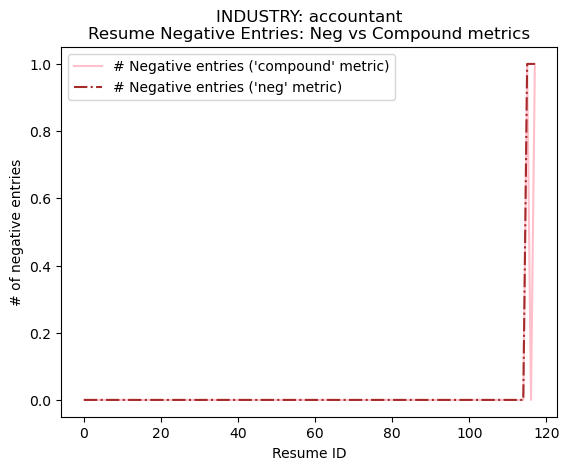

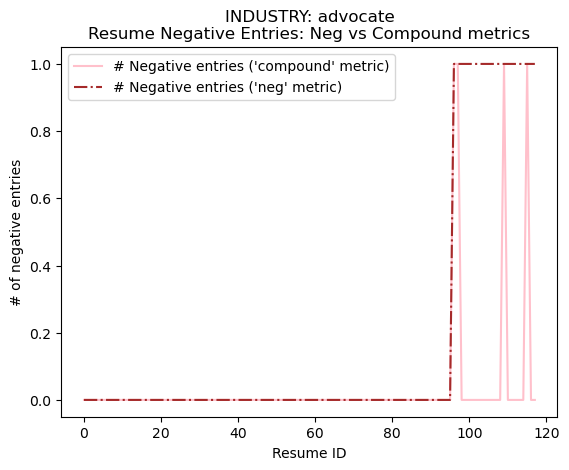

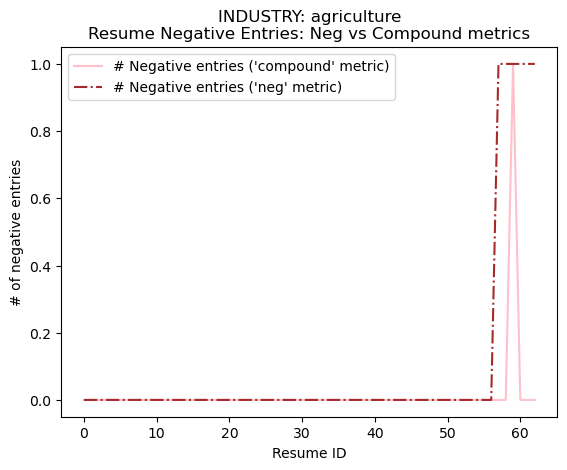

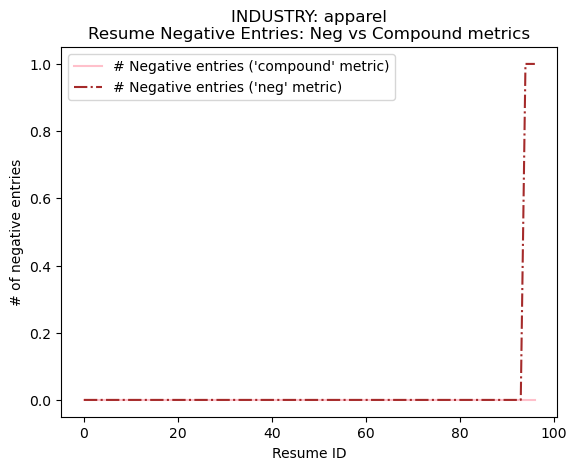

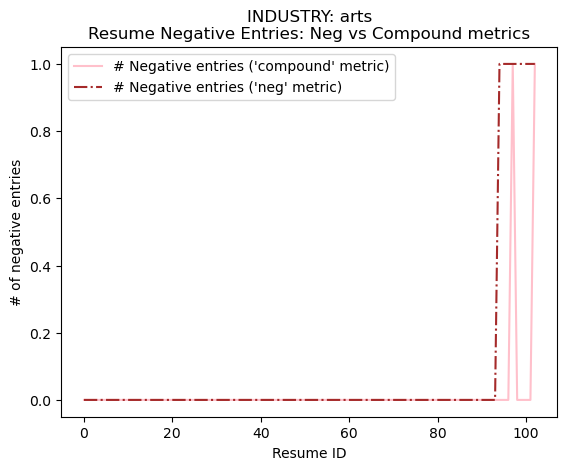

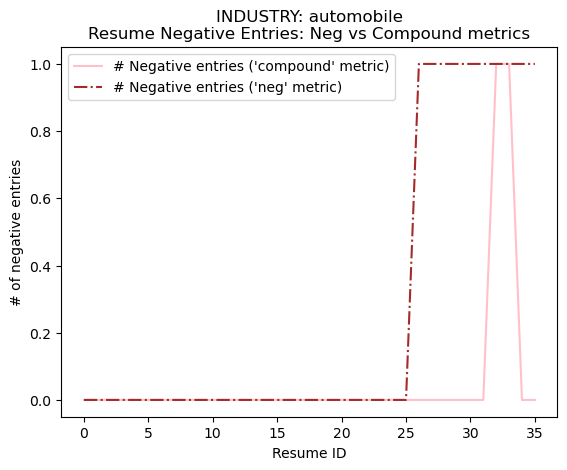

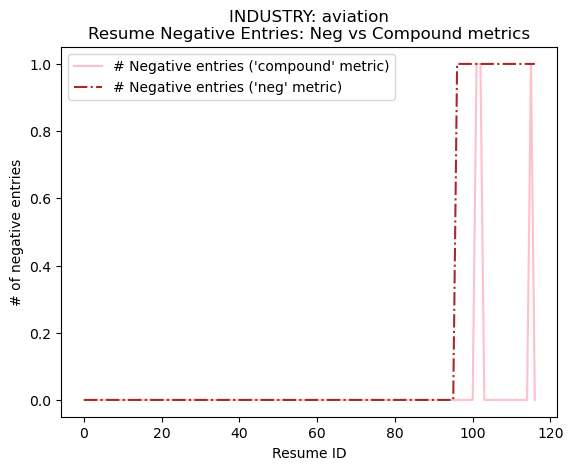

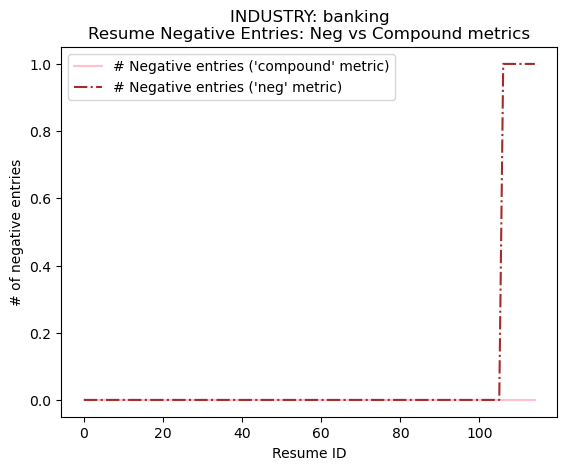

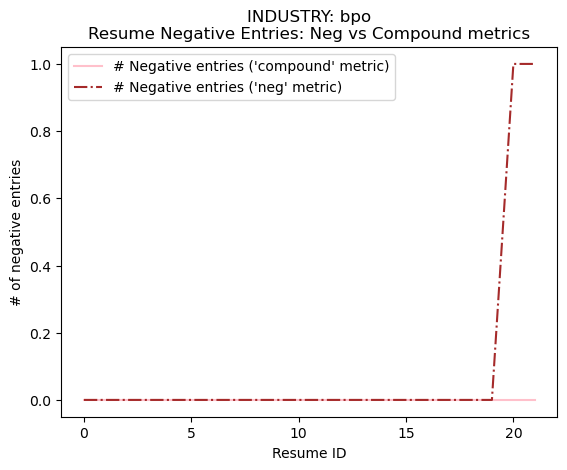

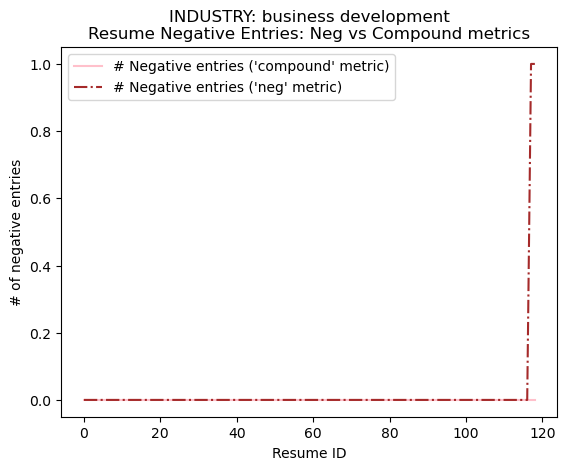

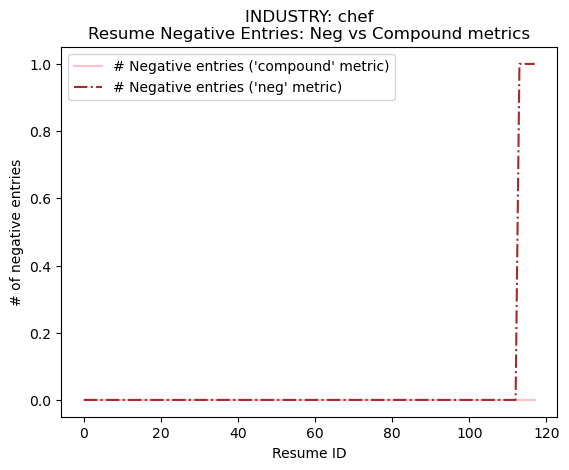

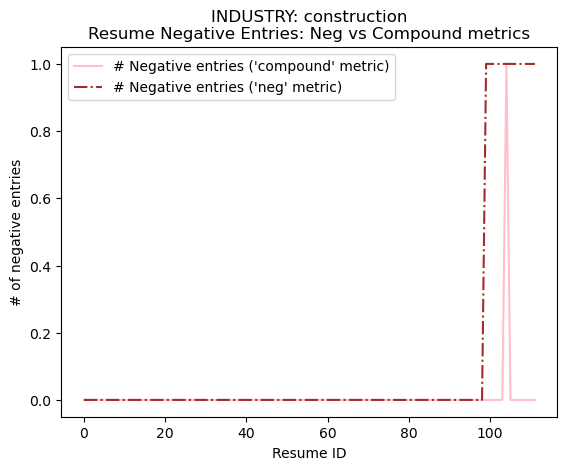

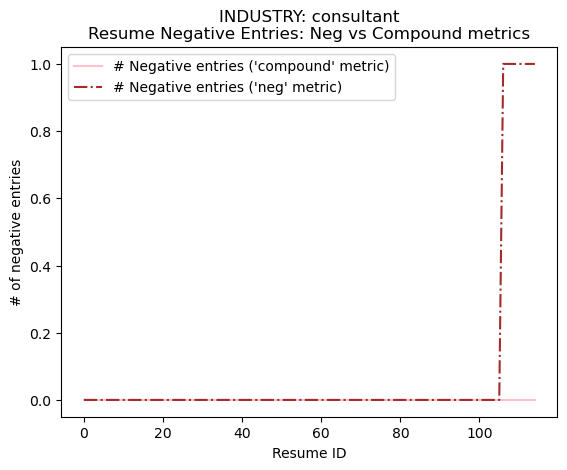

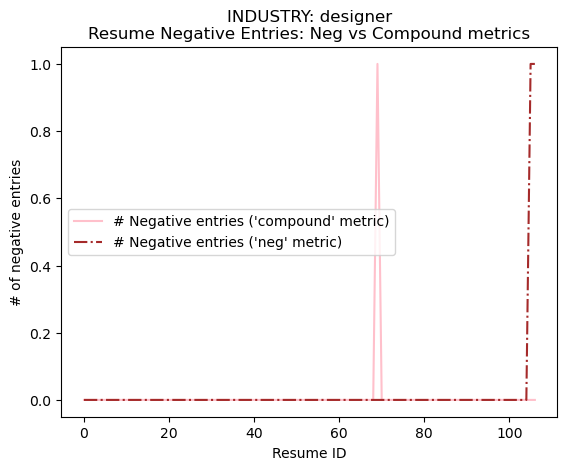

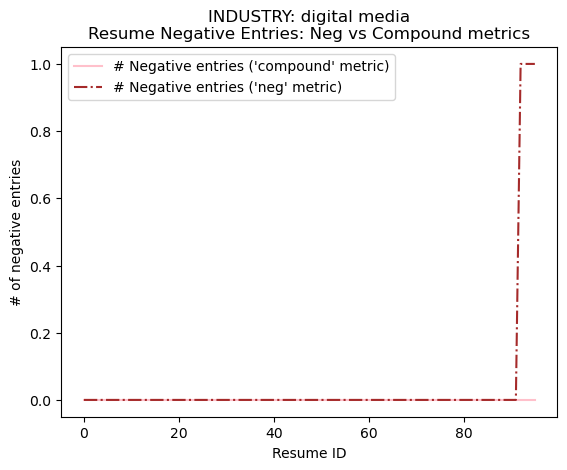

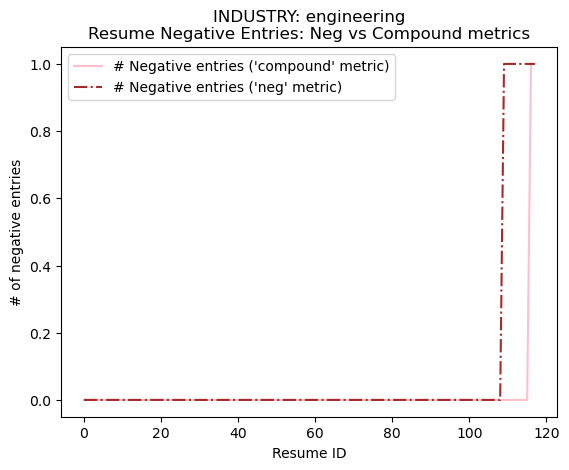

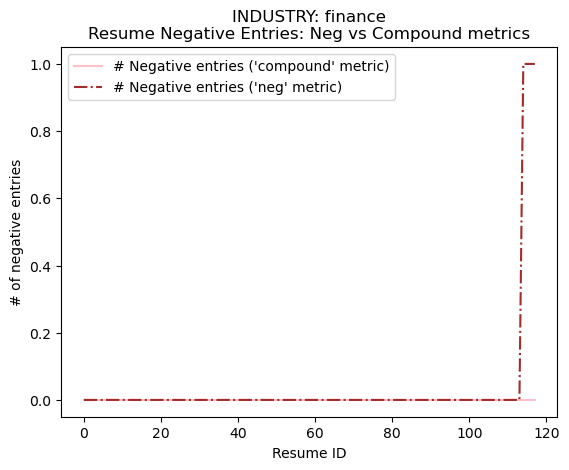

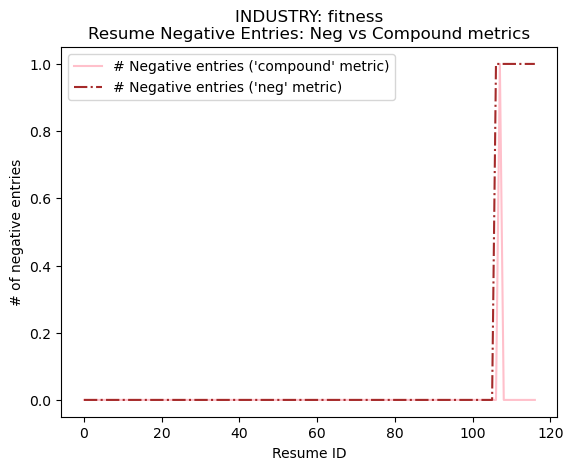

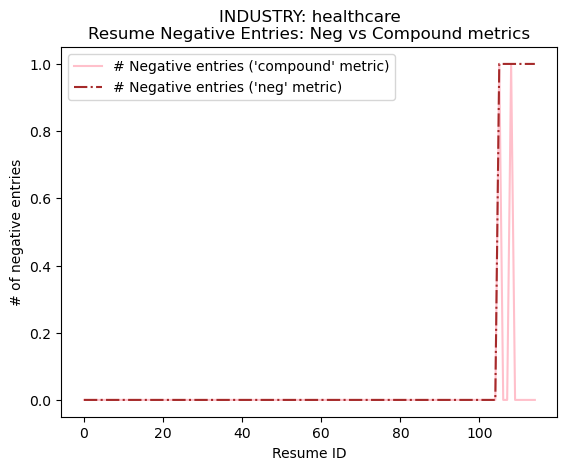

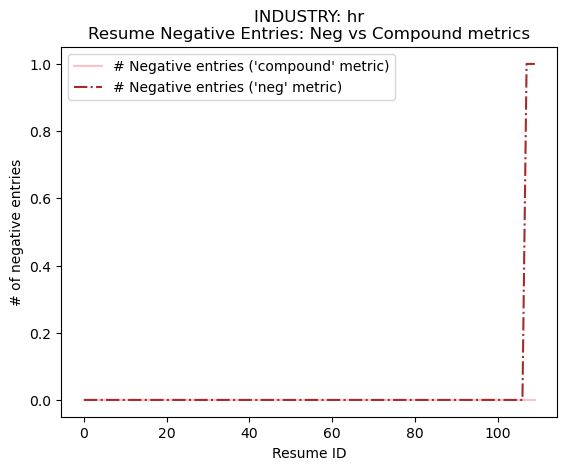

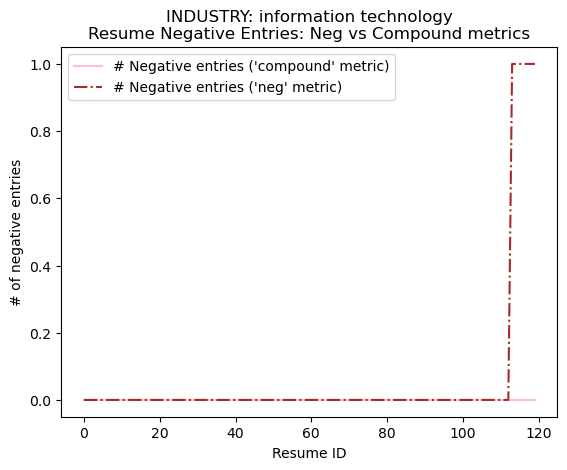

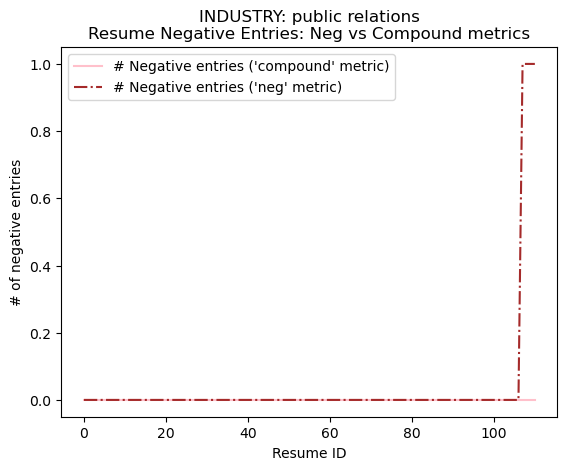

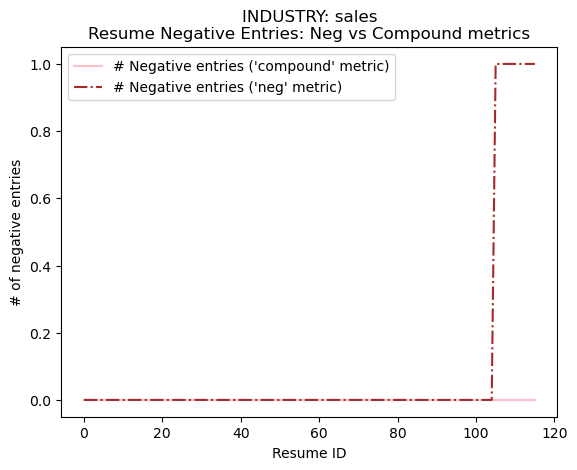

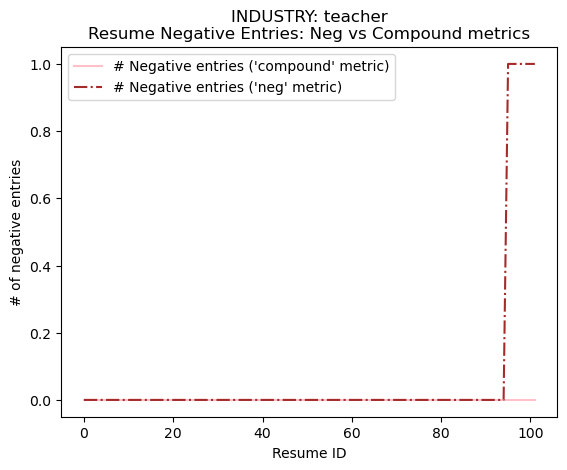

In [107]:
# Function to calculate the number of negative entries from a group of resumes (using 2 metrics)
def get_negative_entries_lists(resumes):
    # calculate number of negative entries using both metrics from sentiment analysis
    neg_results, compound_results = [], []
    
    # loop through each resume
    for i, resume_text in enumerate(resumes):
        
        # calculate the number of negative entries within the resume
        neg_entries = len(evaluate_sentiment(resume_text, method='neg', negativity_threshold=0.05))
        compound_entries = len(evaluate_sentiment(resume_text, method='compound', negativity_threshold=-0.05))
        neg_results.append(neg_entries)
        compound_results.append(compound_entries)
    
    # return lists of # of negative entries using both metrics
    return neg_results, compound_results

# Function to plot the number of negative entries using both metrics
def plot_negative_entries(neg_results, compound_results, title_prefix=''):
    # plot lines and set labels
    plt.plot(compound_results, color='pink', label="# Negative entries ('compound' metric)")
    plt.plot(neg_results, '-.', color='brown', label="# Negative entries ('neg' metric)")
    plt.title(title_prefix + "Resume Negative Entries: Neg vs Compound metrics")
    plt.xlabel("Resume ID")
    plt.ylabel("# of negative entries")
    plt.legend()
    plt.show()

# Function to calculate and compare the number of negative entries from a group of resumes using 2 different metrics
def compare_negative_entries(df_resumes, df_jobs):
    # loop through industries
    for industry in df_resumes['profession'].unique():
        
        # take 1 random job description from dataset from the industry
        job_text = df_jobs[df_jobs['search_term'] == industry]['description_upper'].reset_index(drop=True)[0]
        
        # get all resumes from that industry
        resumes = df_resumes[df_resumes['profession'] == industry]['resume_upper'].reset_index(drop=True)
        
        # get simmilarities, sort them (for best visualization) and plot the visualizations
        neg_results, compound_results = get_negative_entries_lists(resumes)
        sorted_results = sorted(list(zip(neg_results, compound_results)), key=lambda x: x[0], reverse=True)
        sorted_neg = [result[0] for result in sorted_results]
        sorted_compound = [result[1] for result in sorted_results]
        plot_negative_entries(sorted_neg, sorted_compound, title_prefix='INDUSTRY: ' + industry + '\n')

compare_negative_entries(df_resumes, df_jobs)

__Results:__
- The __'neg'__ metric shows more stability when identifying the number of negative netries within a resume.
- The __'compound'__ metric shows some spikes for certain resumes.
- Overall, __most of the resume does not contain negative entries__, even given the fact that we used a __threshold that should maximize the number of negative sentences identified__.

From this results, we decided to __use the 'neg' metric for negative sentences identification.__

__8. Calculating Resume - Job Description overall simmilarity__

One of the most important features for our project is to __calculate the overall simmilarity between the resume and the job description__.

To achieve this metric we have to calculate the cosine simmilarity between both pre-processed texts.

Then we need to vectorize the texts. For vectorization we will test the following techniques:
- __Bag of Words__
- __TF-IDF__

Then we will be able to calculate the __Cosine/pairwise simmilarity__.

### Preprocessing

In [ ]:
class Preprocessing:
    def __init__(self, df):
        '''
            function: Constructor
            arg: df (pandas.core.frame.DataFrame) -> dataframe to perform EDA
            return: None
        '''
        self.df = df
        
    def textPreprocessing(self, textData):
        '''
            function: textPreprocessing -> This function will preprocess the text data
            arg: textData (str) -> The givine string
            return: processedText (str) -> Preprocessed data 
                    tags -> part of speech tags
        '''
        textData = textData.lower() # converting text in to lower cases
        
        textData = re.sub(r'[^a-zA-Z0-9\s]',' ', textData) # removing all the special characters from the text
        
#         sentTokenizeList = sent_tokenize(textData)
        # creating the list of the stop words.
        # job posts contains french and English text 
        stopWordsEng = set(stopwords.words('english'))
        stopWordsFre = set(stopwords.words('french'))
        
        # creating an instance for the lemmatization
        lemmetizing = WordNetLemmatizer()
        processedSentList = []
        wordTokenized = word_tokenize(textData)
        tokens = [word for word in wordTokenized if word not in stopWordsEng] # removing English stop words
        tokens = [word for word in wordTokenized if word not in stopWordsFre] # removing French stop words
        
#         lemmatizedTokens = [lemmetizing.lemmatize(word, pos='V') for word in tokens] # converting text into it's root form
        processedText = ' '.join(tokens)
        
#         blob = TextBlob(' '.join(tokens)) # pos tagging words
#         tags = [tag for tag in blob.tags if tag[1].startswith('v')]
        
        return  processedText # pd.Series([processedText, tags])
    
    def textEDA(self):
        '''
            function: textEDA -> This function will disply word clouds for remot and In person jobs
            arg: None
            return: None
        '''
        remotDf = self.df[self.df['is_remote'] == True] # Datafreme that contains only remote jobs
        NonremotDf = self.df[self.df['is_remote'] == False] # Datafreme that contains only In-person jobs
        
        self.printLine()
        print('Word colud for Remot Jobs')
        self.printLine()
        text_isRemot = remotDf['preprocessedText'].str.cat(sep=' ')
        # Word cloud creation for remot jobs
        isRemot_wordcloud = WordCloud(width=800, height=500,background_color='black').generate(text_isRemot) 
        plt.imshow(isRemot_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
        self.printLine()
        print('Word colud for In-person jobs')
        self.printLine()
        text_isNotRemot = NonremotDf['preprocessedText'].str.cat(sep=' ')   
        # Word cloud creation for In-person jobs
        isNotRemot_wordcloud = WordCloud(width=800, height=500,background_color='black').generate(text_isNotRemot)
        plt.imshow(isNotRemot_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    
    def droppingColumns(self):
        '''
            function: droppingColumns -> This function will drop all the unnecessary columns 
            arg: None
            return: None
        '''
        '''
            All of the columns are not necessary and also have high rate of missing values, 
            so these will not be beneficial for the anaysis and prediction
            site -> The site from where the data is scrapped (Fixed value -> indeed)
            emails -> Email of the contact preson for the job inquiry
            job_url_direct -> URL for job application
            company_url -> URL for company site
            company_url_direct -> URL for job application on company's site
            logo_photo_url -> URL for logo of the company
            banner_photo_url -> URL for logo of the company
            ceo_photo_url -> URL for CEO's phot
            company_addresses -> Address of the company
            company_num_employees -> number of employees in the company
            company_revenue -> the revenue generated by company
            company_description -> details of the company
            ceo_name -> name of the company CEO
            date_posted -> date of the job posted 
            company_industry -> Domain of the company
        '''
        '''
            All of these columns are not useful due to the high percentage of missing vlaues 
            interval
            min_amount 
            max_amount
            currency
        '''
        cols = ['site', 'job_url', 'job_url_direct', 'interval', 'min_amount', 'max_amount','currency','emails', 'company_url', 
                'company_url_direct', 'logo_photo_url', 'banner_photo_url', 'ceo_photo_url', 'company_addresses', 
                'company_num_employees', 'company_revenue', 'company_description', 'company_description', 'ceo_name',
                'date_posted', 'company_industry']
        self.df.drop(columns=cols, inplace=True)
        
    def dropDuplicates(self):
        '''
            function: dropDuplicates -> This function will drop duplicates
            arg: None
            return: None
        '''
        # dropping duplicates 
        self.df.drop_duplicates(inplace=True)
    
    def CatlabelEncoding(self, column):
        '''
            function: labelEncoding -> performs label encoding on the catagorical columns
            arg: column (List) -> List of the names of the columns 
            return: None
        '''
        labelEncoder = LabelEncoder()
        for col in column:
            self.df[col] = labelEncoder.fit_transform(self.df[col])

    def printLine(self):
        '''
            function: printLine -> This function will provide the print format for the class output
            arg: None
            return: None
        '''
        # creting the print format
        print('-'*120)


In [ ]:
preprocess = Preprocessing(dfJobDes)

In [ ]:
# dfJobDes[['preprocessedText', 'JobVerbs']] = dfJobDes['description'].apply(preprocess.textPreprocessing)
dfJobDes['preprocessedText'] = dfJobDes['description'].apply(preprocess.textPreprocessing)

In [ ]:
preprocess.droppingColumns()

In [ ]:
preprocess.dropDuplicates()

In [ ]:
preprocess.textEDA()

In [ ]:
preprocess.CatlabelEncoding(['is_remote'])

In [ ]:
dfJobDes.tail(1)

In [ ]:
preprocessResume = Preprocessing(df_Resume)

In [ ]:
df_Resume['preprocessedText'] = df_Resume['resume'].apply(preprocess.textPreprocessing)

In [ ]:
df_Resume.tail()

### Cosine simmilarity analysis (Resume entries VS Job description entries)

In [ ]:
def tfidfVectorizor(text):
    tfidf = TfidfVectorizer(min_df=1, stop_words="english")
    feature_matrix = tfidf.fit_transform(text)
    col_names = tfidf.get_feature_names_out()
    arr = feature_matrix.toarray()
    df_ = pd.DataFrame(arr, columns = col_names)
    return df_

In [ ]:
df_jobdesc = tfidfVectorizor(dfJobDes['preprocessedText'])

In [ ]:
df_resume = tfidfVectorizor(df_Resume['preprocessedText'])

In [ ]:
df_concat = pd.concat([df_jobdesc, df_resume], ignore_index=True)
df_concat = df_concat.fillna(0.0)
df_concat = df_concat.iloc[:, : df_jobdesc.shape[1]]

In [ ]:
df_resume_concat = df_concat.iloc[-len(df_resume):]
df_resume_concat.reset_index(drop=True, inplace=True)

In [ ]:
df_jobdesc

In [ ]:
matrix_jobdesc = spicy.sparse.csr_matrix(df_jobdesc.values)
matrix_resume = spicy.sparse.csr_matrix(df_resume_concat.values)

print("Job Description matrix shape:", matrix_jobdesc.shape)
print("Resume matrix shape:", matrix_resume.shape)

In [ ]:
simmilarity_matrix = matrix_jobdesc * matrix_resume.T
simmilarity_matrix

In [ ]:
simmilarity_matrix.todense() # simmilarities between each resume entry (columns) and each job description entry (rows)

In [ ]:
best_simmilarities = []

# loop through job description entries and find the resume entry with most simmilarity
for i in range(matrix_jobdesc.shape[0]):
    simmilarities = [matrix.item(i) for matrix in simmilarity_matrix.todense().T] # save simmilarities
    max_sim = max(simmilarities) # get max simmilarity
    max_sim_index = simmilarities.index(max_sim)
    best_simmilarities.append((max_sim_index, max_sim))

best_simmilarities[:10]

In [ ]:
for i in range(matrix_jobdesc.shape[0]):
    best_sim = best_simmilarities[i][1]
    best_sim_index = best_simmilarities[i][0]
    if best_sim_index in dfJobDes['preprocessedText'] and best_sim != 0.0:
        dfJobDes['preprocessedText'][best_sim_index]

In [ ]:
# for i in range(matrix_jobdesc.shape[0]):
#     print("Job description entry:\t\t", "" if i not in dfJobDes['preprocessedText'] else dfJobDes['preprocessedText'][i])
#     best_sim = best_simmilarities[i][1]
#     print("% Best simmilarity:\t\t", round(best_sim * 100, 2), "%")
#     best_sim_index = best_simmilarities[i][0]
#     print("Best simmilarity in resume:\t", "NOT FOUND" if best_sim_index not in dfJobDes['preprocessedText'] or best_sim == 0.0 else dfJobDes['preprocessedText'][best_sim_index])
#     print("-"*30)
#     if i == 10: break